# Behavioral Finance Patterns in Predicting Global Financial Crises: An Analytical Approach to Crisis Forecasting

Dharshani A

## Global Financial Crisis Analytics

This notebook explores the global financial crisis dataset from Harvard Business School (https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/default.aspx).

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import shutil

from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from IPython.display import display
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')


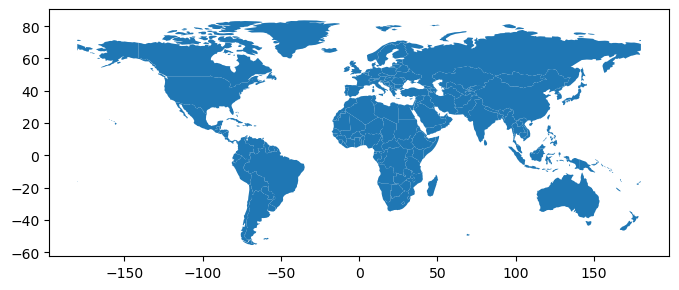

In [2]:
world_data = gpd.read_file(r"C:\Users\dhars\Desktop\TRIMESTER 1\Z-Major Project T1\Dataset\world-data.geojson").query('name != "Antarctica"')
world_data.plot(figsize=(8,8))
plt.show()

In [3]:
world_data.head()

iso_a3                      name      continent  \
0    FJI                      Fiji        Oceania   
1    TZA                  Tanzania         Africa   
2    ESH                 W. Sahara         Africa   
3    CAN                    Canada  North America   
4    USA  United States of America  North America   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [4]:
crisis_data = pd.read_csv(r"C:\Users\dhars\Desktop\TRIMESTER 1\Z-Major Project T1\Dataset\20160923_global_crisis_data.csv")

In [5]:
# Minor data cleansing
crisis_data = crisis_data.query('Year > 1800').replace({np.nan:0})
crisis_data['Banking Crisis '] = crisis_data['Banking Crisis '].apply(
    lambda d: int(d)
)
crisis_data['Systemic Crisis'] = crisis_data['Systemic Crisis'].apply(
    lambda d: int(d)
)
crisis_data['Currency Crises'] = crisis_data['Currency Crises'].apply(
    lambda d: int(d)
)
crisis_data['Inflation Crises'] = crisis_data['Inflation Crises'].apply(
    lambda d: int(d)
)


In [6]:
crisis_data.head()

Case  CC3  Country  Year  Banking Crisis  Banking_Crisis_Notes  \
1     1  DZA  Algeria  1801                0                    0   
2     1  DZA  Algeria  1802                0                    0   
3     1  DZA  Algeria  1803                0                    0   
4     1  DZA  Algeria  1804                0                    0   
5     1  DZA  Algeria  1805                0                    0   

   Systemic Crisis  Gold Standard exch_usd  exch_usd_alt1  ...  \
1                0            0.0        0            0.0  ...   
2                0            0.0        0            0.0  ...   
3                0            0.0        0            0.0  ...   
4                0            0.0        0            0.0  ...   
5                0            0.0        0            0.0  ...   

  Domestic_Debt_ Notes/Sources  \
1                            0   
2                            0   
3                            0   
4                            0   
5                            0   

  SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors  \
1                                                  0                                                                                                                                                  
2                                                  0                                                                                                                                                  
3                                                  0                                                                                                                                                  
4                                                  0                                                                                                                                                  
5                                                  0                                                                                                                                                  

  SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors  \
1                                                0.0                                                                                                                                                           
2                                                0.0                                                                                                                                                           
3                                                0.0                                                                                                                                                           
4                                                0.0                                                                                                                                                           
5                                                0.0                                                                                                                                                           

  Defaults_External_Notes GDP_Weighted_default    <  \
1                       0                    0  0.0   
2                       0                    0  0.0   
3                       0                    0  0.0   
4                       0                    0  0.0   
5                       0                    0  0.0   

   Inflation, Annual percentages of average consumer prices Independence  \
1                                                  0                   0   
2                                                  0       

In [7]:
crisis_data.describe()

Case          Year  Banking Crisis   Systemic Crisis  \
count  15120.000000  15120.000000     15120.000000      15120.00000   
mean      35.500000   1908.500000         0.053373          0.03750   
std       20.205866     62.355223         0.224784          0.18999   
min        1.000000   1801.000000         0.000000          0.00000   
25%       18.000000   1854.750000         0.000000          0.00000   
50%       35.500000   1908.500000         0.000000          0.00000   
75%       53.000000   1962.250000         0.000000          0.00000   
max       70.000000   2016.000000         1.000000          1.00000   

       Gold Standard  exch_usd_alt1  Domestic_Debt_In_Default  \
count   15120.000000   1.512000e+04              15120.000000   
mean        0.119841   2.847374e+04                  0.021693   
std         0.324787   3.456540e+06                  0.145684   
min         0.000000   0.000000e+00                  0.000000   
25%         0.000000   0.000000e+00                  0.000000   
50%         0.000000   0.000000e+00                  0.000000   
75%         0.000000   0.000000e+00                  0.000000   
max         1.000000   4.250000e+08                  1.000000   

       SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors  \
count                                       15120.000000                                                                                                                                                            
mean                                            0.126124                                                                                                                                                            
std                                             0.332000                                                                                                                                                            
min                                             0.000000                                                                                                                                                            
25%                                             0.000000                                                                                                                                                            
50%                                             0.000000                                                                                                                                                            
75%                                             0.000000                                                                                                                                                            
max                                             1.000000                                                                                                                                                            

                  <  Independence  Currency Crises  Inflation Crises  
count  15120.000000  15120.000000     15120.000000      15120.000000  
mean       0.043320      0.672685         0.082011          0.075794  
std        0.203583      0.469249         0.283402          0.264676  
min        0.000000      0.000000         0.000000          0.000000  
25%        0.000000      0.000000         0.000000          0.000000  
50%        0.000000      1.000000         0.000000          0.000000  
75%        0.000000      1.000000         0.000000          0.000000  
max        1.000000      1.000000         2.000000          1.000000

In [8]:
crisis_data.nunique()

Case                                                                                                                                                                                                            70
CC3                                                                                                                                                                                                             70
Country                                                                                                                                                                                                         70
Year                                                                                                                                                                                                           216
Banking Crisis                                                                                                                                              

In [9]:
# Performing outliers test
numerical_cols = crisis_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

def detect_outliers(df, features):
    outlier_indices = []
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

outliers = detect_outliers(crisis_data, numerical_cols)
outliers_data = crisis_data.loc[outliers]
outliers_data

Case  CC3   Country  Year  Banking Crisis  Banking_Crisis_Notes  \
70        1  DZA   Algeria  1870                1                    0   
77        1  DZA   Algeria  1877                0                    0   
78        1  DZA   Algeria  1878                0                    0   
79        1  DZA   Algeria  1879                0                    0   
80        1  DZA   Algeria  1880                0                    0   
...     ...  ...       ...   ...              ...                  ...   
15185    70  ZWE  Zimbabwe  2012                0                    0   
15186    70  ZWE  Zimbabwe  2013                0                    0   
15187    70  ZWE  Zimbabwe  2014                0                    0   
15188    70  ZWE  Zimbabwe  2015                0                    0   
15189    70  ZWE  Zimbabwe  2016                0                    0   

       Systemic Crisis  Gold Standard  exch_usd  exch_usd_alt1  ...  \
70                   1            0.0  0.052264            0.0  ...   
77                   0            0.0  0.051867            0.0  ...   
78                   0            1.0  0.051948            0.0  ...   
79                   0            1.0  0.052029            0.0  ...   
80                   0            1.0  0.052356            0.0  ...   
...                ...            ...       ...            ...  ...   
15185                0            0.0     361.9            0.0  ...   
15186                0            0.0     361.9            0.0  ...   
15187                0            0.0         0            0.0  ...   
15188                0            0.0         0            0.0  ...   
15189                0            0.0         0            0.0  ...   

      Domestic_Debt_ Notes/Sources  \
70                               0   
77                               0   
78                               0   
79                               0   
80                               0   
...                            ...   
15185                            0   
15186                            0   
15187                            0   
15188                            0   
15189                            0   

      SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors  \
70                                                     0                                                                                                                                                  
77                                                     0                                                                                                                                                  
78                                                     0                                                                                                                                                  
79                                                     0                                                                                                                                                  
80                                                     0                                                                                                                                                  
...                                                  ...                                                                                                                                                  
15185                                                  1                                                                                                                                                  
15186                                                  1                                                                                                                                

In [10]:
# Calculate the number of missing values per column
missing_values = crisis_data.isnull().sum()
print(missing_values)

Case                                                                                                                                                                                                          0
CC3                                                                                                                                                                                                           0
Country                                                                                                                                                                                                       0
Year                                                                                                                                                                                                          0
Banking Crisis                                                                                                                                                          

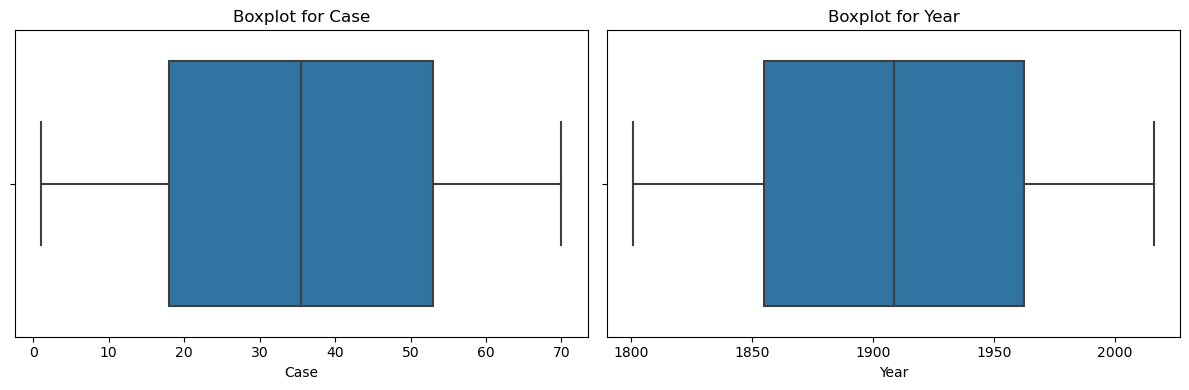

In [11]:
numerical_columns = ['Case', 'Year']
n_cols = len(numerical_columns)
n_rows = 1  # Since we have only two columns, we need only one row

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))

# Create a boxplot for each of the specified columns
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=crisis_data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

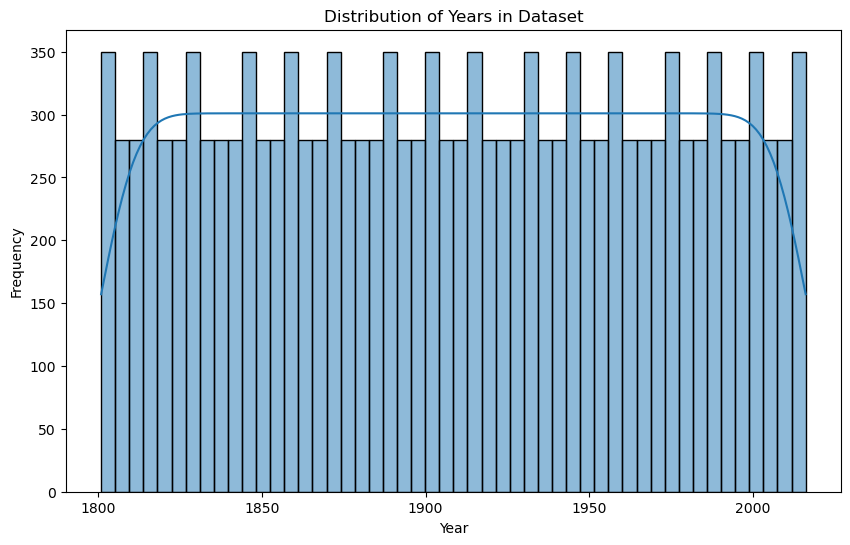

In [12]:
# Histogram of the 'Year' column
plt.figure(figsize=(10, 6))
sns.histplot(crisis_data['Year'].dropna(), bins=50, kde=True)
plt.title('Distribution of Years in Dataset')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

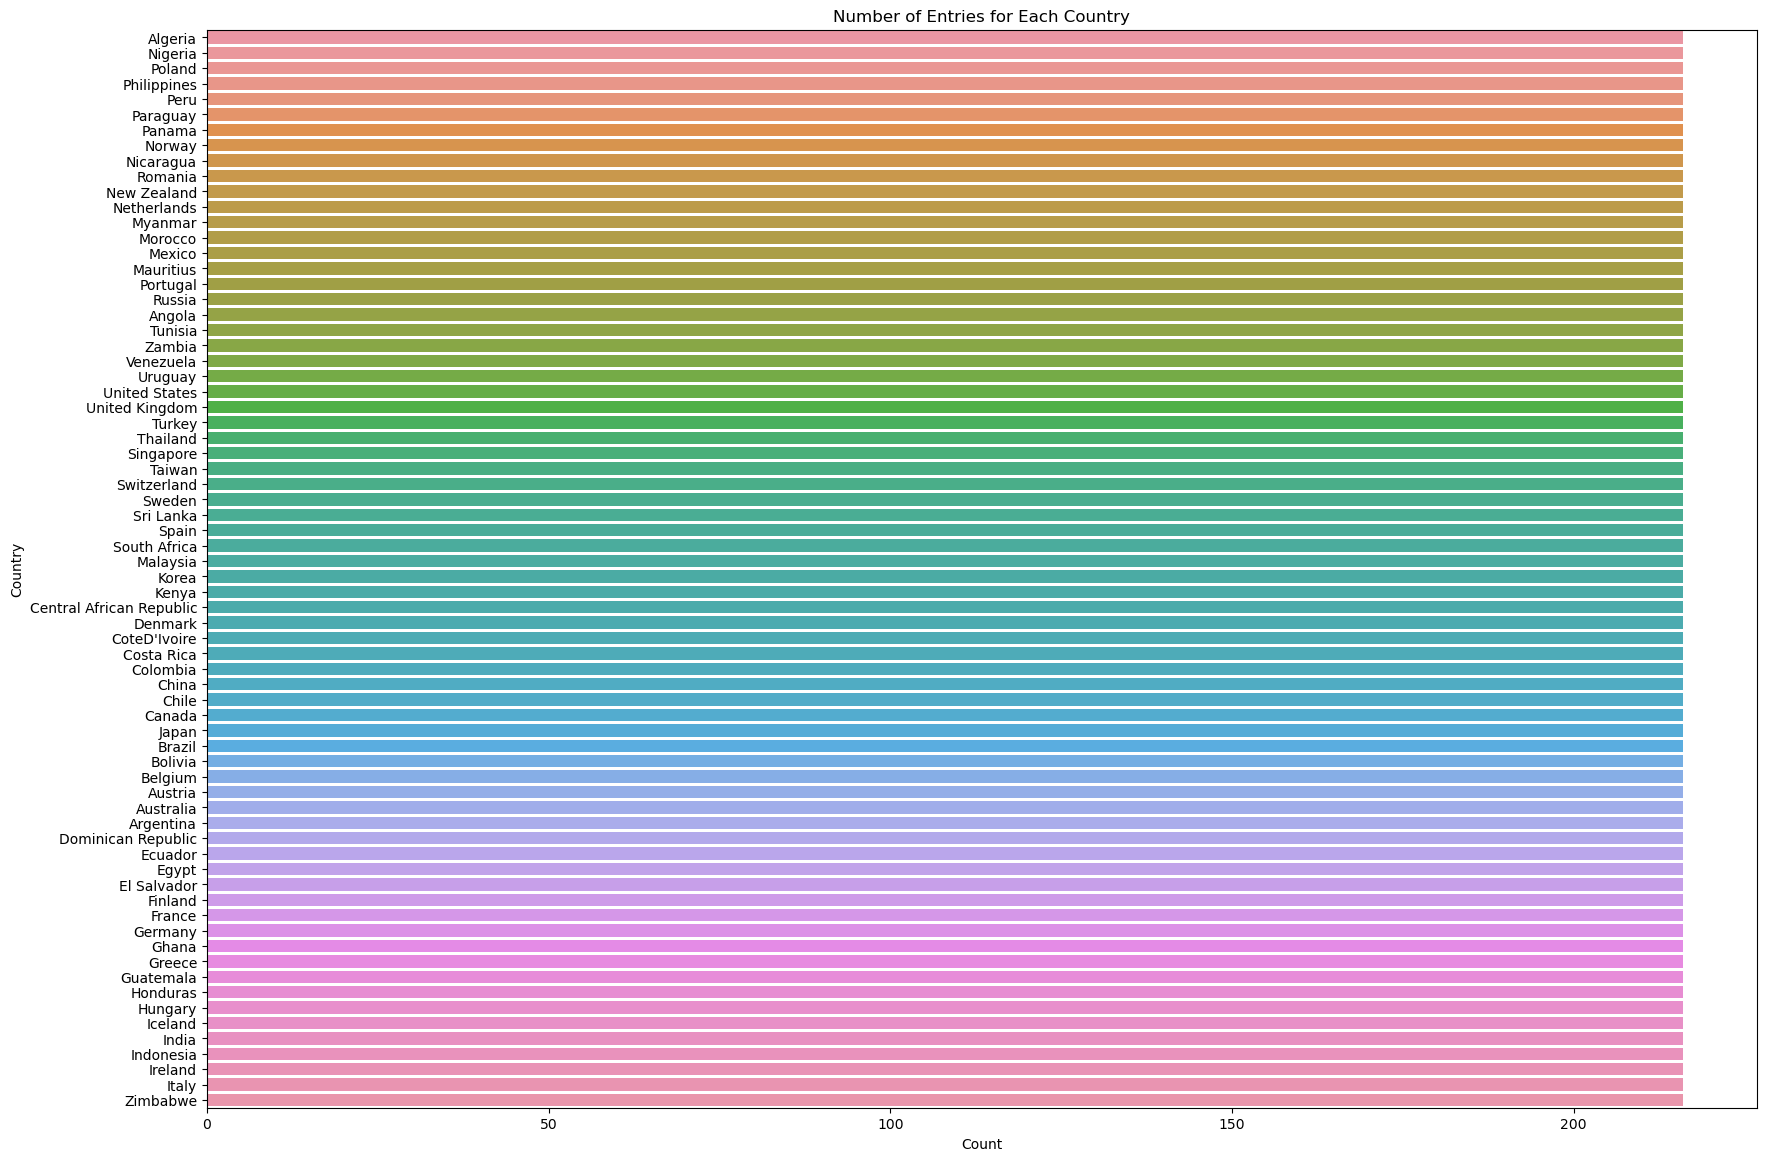

In [13]:
# Count plot of the top 10 countries by the number of entries
top_countries = crisis_data['Country'].value_counts().head(70).index
plt.figure(figsize=(20, 14))
sns.countplot(y=crisis_data['Country'], order=top_countries)
plt.title('Number of Entries for Each Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

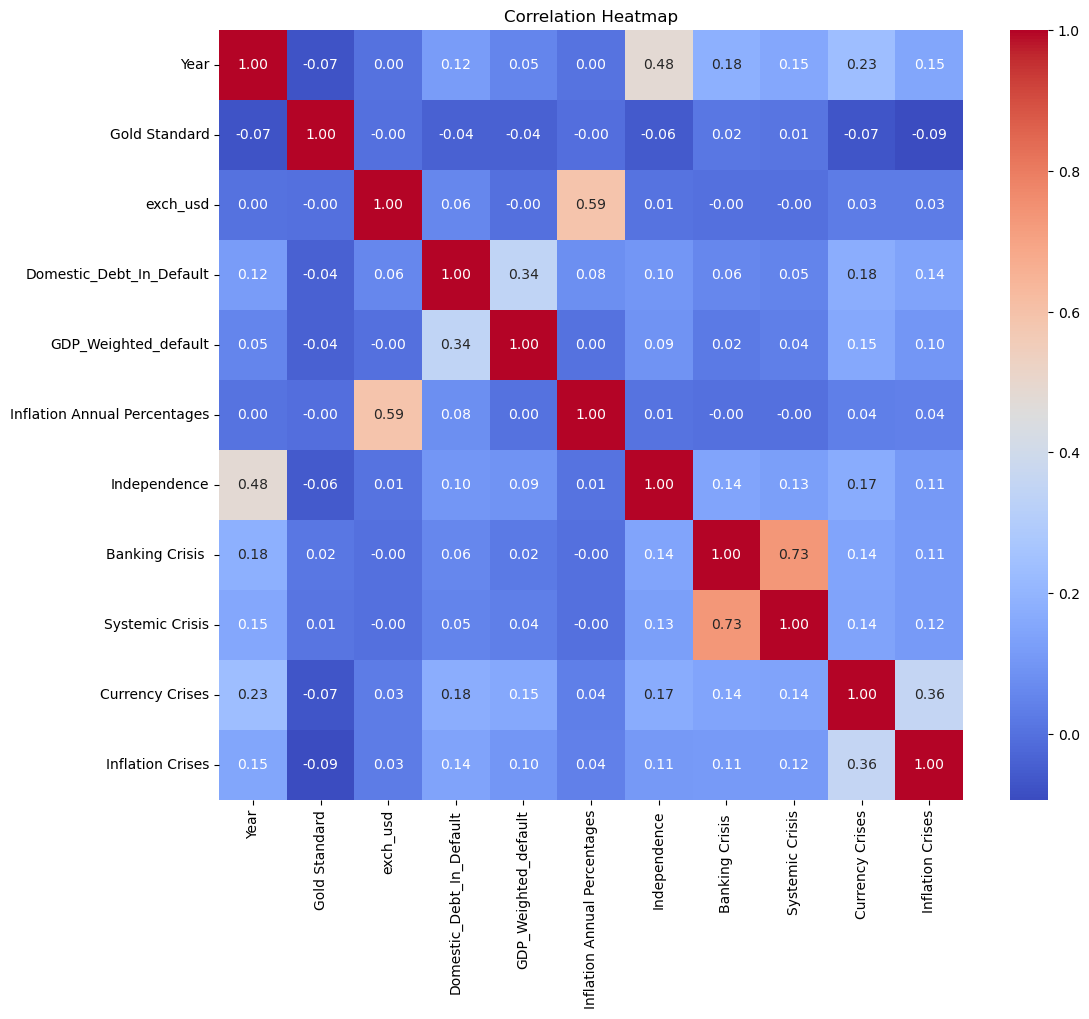

In [14]:
# Selected columns for the correlation matrix
selected_columns = ['Year', 'Gold Standard', 'exch_usd', 'Domestic_Debt_In_Default',
                    'GDP_Weighted_default', 'Inflation, Annual percentages of average consumer prices',
                    'Independence', 'Banking Crisis ', 'Systemic Crisis', 'Currency Crises', 'Inflation Crises']

# Replace spaces with NaN and convert columns to float
for col in selected_columns:
    crisis_data[col] = pd.to_numeric(crisis_data[col].replace(' ', np.nan), errors='coerce')

# Drop rows with NaN values in selected columns
crisis_data = crisis_data.dropna(subset=selected_columns)

# Calculate the correlation matrix
correlation_matrix = crisis_data[selected_columns].corr()

# Renaming 'Inflation, Annual percentages of average consumer prices' to 'Inflation Annual Percentages' for the heatmap
correlation_matrix = correlation_matrix.rename(index={'Inflation, Annual percentages of average consumer prices': 'Inflation Annual Percentages'},
                                               columns={'Inflation, Annual percentages of average consumer prices': 'Inflation Annual Percentages'})

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



### Crisis Summarization

Summarize number of crisis years for each country.

In [15]:
crisis_summary = crisis_data.groupby(['CC3']).agg({'Banking Crisis ':'sum', 'Systemic Crisis':'sum','Currency Crises':'sum', 'Inflation Crises':'sum' })

In [16]:
crisis_summary

Banking Crisis   Systemic Crisis  Currency Crises  Inflation Crises
CC3                                                                     
AGO                7                0               22                32
ARG               15               17               27                48
AUS               11                4               51                 9
AUT                8                7               31                28
BEL               19               18                6                11
..               ...              ...              ...               ...
USA               33               20               32                 3
VEN               15               14               19                27
ZAF               11                0               16                 1
ZMB                4                4               19                21
ZWE               12               12               18                16

[70 rows x 4 columns]

In [17]:
crisis_world_summary = world_data.merge(crisis_summary, left_on='iso_a3', right_on='CC3', how='left')
crisis_world_summary.replace({np.nan:0}, inplace=True)

In [18]:
crisis_world_summary.head()

iso_a3                      name      continent  \
0    FJI                      Fiji        Oceania   
1    TZA                  Tanzania         Africa   
2    ESH                 W. Sahara         Africa   
3    CAN                    Canada  North America   
4    USA  United States of America  North America   

                                            geometry  Banking Crisis   \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...              0.0   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...              0.0   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...              0.0   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...             11.0   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...             33.0   

   Systemic Crisis  Currency Crises  Inflation Crises  
0              0.0              0.0               0.0  
1              0.0              0.0               0.0  
2              0.0              0.0               0.0  
3              7.0              2.0               1.0  
4             20.0             32.0               3.0

In [19]:
top_limit = 20

title = f'<div style="font-weight: bold; font-size: 16pt;">Top {top_limit} Countries with most Banking Crisis events</div>'
subtitle = f'<div style="font-size: 12pt;">1800 to Present</div>'
display(HTML(title))
display(HTML(subtitle))

crisis_world_summary[['name','continent', 'Banking Crisis ']] \
    .sort_values(['Banking Crisis '], ascending=[False]) \
    .head(top_limit)

name      continent  Banking Crisis 
4    United States of America  North America             33.0
143            United Kingdom         Europe             33.0
132                     Spain         Europe             30.0
43                     France         Europe             26.0
141                     Italy         Europe             26.0
155                     Japan           Asia             24.0
130               Netherlands         Europe             23.0
142                   Denmark         Europe             22.0
98                      India           Asia             21.0
110                    Sweden         Europe             21.0
129                   Belgium         Europe             19.0
66       Central African Rep.         Africa             19.0
29                     Brazil  South America             18.0
27                     Mexico  North America             17.0
21                     Norway         Europe             15.0
40                  Venezuela  South America             15.0
131                  Portugal         Europe             15.0
9                   Argentina  South America             15.0
139                     China           Asia             14.0
31                       Peru  South America             14.0

In [20]:
top_limit = 20

title = f'<div style="font-weight: bold; font-size: 16pt;">Top {top_limit} Countries with most Systemic Crisis events</div>'
subtitle = f'<div style="font-size: 12pt;">1800 to Present</div>'
display(HTML(title))
display(HTML(subtitle))

crisis_world_summary[['name','continent', 'Systemic Crisis']] \
    .sort_values(['Systemic Crisis'], ascending=[False]) \
    .head(top_limit)

name      continent  Systemic Crisis
130               Netherlands         Europe             23.0
4    United States of America  North America             20.0
143            United Kingdom         Europe             20.0
66       Central African Rep.         Africa             19.0
129                   Belgium         Europe             18.0
9                   Argentina  South America             17.0
43                     France         Europe             15.0
117                   Romania         Europe             15.0
40                  Venezuela  South America             14.0
29                     Brazil  South America             14.0
13                      Kenya         Africa             13.0
132                     Spain         Europe             13.0
56                    Nigeria         Africa             13.0
147               Philippines           Asia             13.0
48                   Zimbabwe         Africa             12.0
91                   Thailand           Asia             12.0
27                     Mexico  North America             12.0
31                       Peru  South America             11.0
110                    Sweden         Europe             11.0
123                    Greece         Europe             11.0

In [21]:
top_limit = 20

title = f'<div style="font-weight: bold; font-size: 16pt;">Top {top_limit} Countries with most Currency Crisis events</div>'
subtitle = f'<div style="font-size: 12pt;">1800 to Present</div>'
display(HTML(title))
display(HTML(subtitle))

crisis_world_summary[['name','continent', 'Currency Crises']] \
    .sort_values(['Currency Crises'], ascending=[False]) \
    .head(top_limit)

name      continent  Currency Crises
29                     Brazil  South America             67.0
18                     Russia         Europe             52.0
137                 Australia        Oceania             51.0
10                      Chile  South America             49.0
28                    Uruguay  South America             45.0
124                    Turkey           Asia             44.0
4    United States of America  North America             32.0
32                   Colombia  South America             32.0
114                   Austria         Europe             31.0
31                       Peru  South America             29.0
139                     China           Asia             27.0
113                    Poland         Europe             27.0
9                   Argentina  South America             27.0
59                      Ghana         Africa             26.0
123                    Greece         Europe             25.0
44                    Ecuador  South America             25.0
27                     Mexico  North America             25.0
156                  Paraguay  South America             24.0
144                   Iceland         Europe             22.0
8                   Indonesia           Asia             22.0

In [22]:
top_limit = 20

title = f'<div style="font-weight: bold; font-size: 16pt;">Top {top_limit} Countries with most Inflation Crisis events</div>'
subtitle = f'<div style="font-size: 12pt;">1800 to Present</div>'
display(HTML(title))
display(HTML(subtitle))

crisis_world_summary[['name','continent', 'Inflation Crises']] \
    .sort_values(['Inflation Crises'], ascending=[False]) \
    .head(top_limit)

name      continent  Inflation Crises
29        Brazil  South America              49.0
9      Argentina  South America              48.0
124       Turkey           Asia              41.0
96   South Korea           Asia              39.0
10         Chile  South America              39.0
113       Poland         Europe              39.0
28       Uruguay  South America              36.0
8      Indonesia           Asia              35.0
32      Colombia  South America              34.0
74        Angola         Africa              32.0
18        Russia         Europe              29.0
114      Austria         Europe              28.0
30       Bolivia  South America              27.0
40     Venezuela  South America              27.0
93       Myanmar           Asia              26.0
44       Ecuador  South America              25.0
31          Peru  South America              25.0
144      Iceland         Europe              25.0
59         Ghana         Africa              24.0
155        Japan           Asia              23.0

### Mapping Financial Crisis Summary

Generate a map of Banking, Systemic, Currency and inflation Crises by country since 1800.

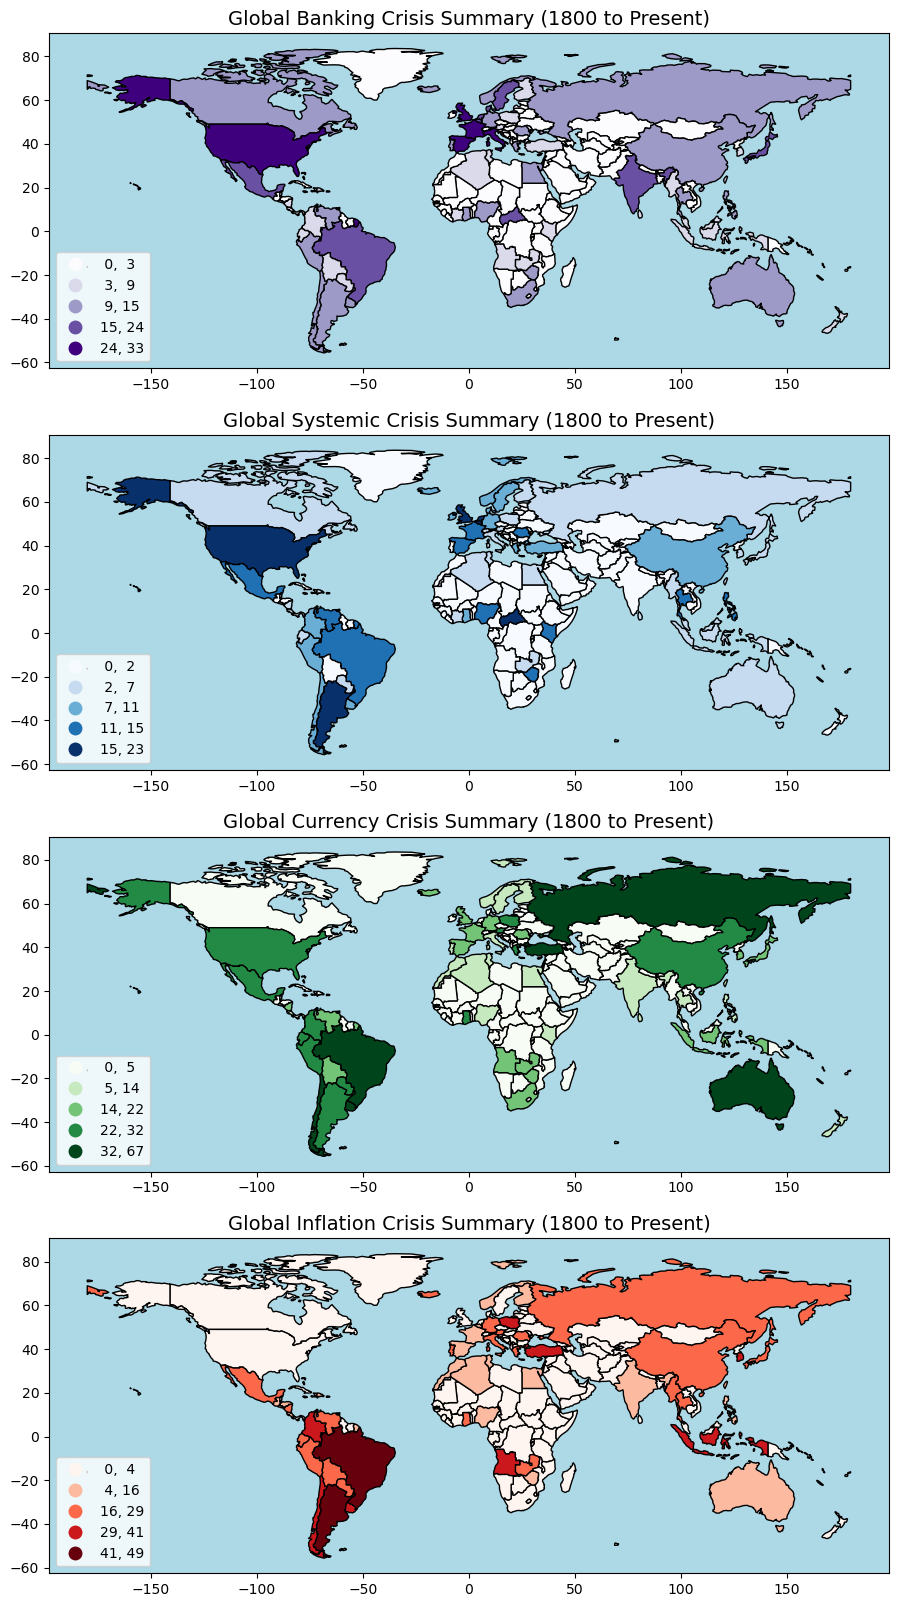

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(20, 20))

# Banking Crisis (Changed color to purple)
ax1 = axes[0]
ax1.set_title('Global Banking Crisis Summary (1800 to Present)', fontsize=14)
ax1.set_facecolor('lightblue')

crisis_world_summary.plot(
    ax=ax1,
    cmap='Purples',  # Changed cmap color to purple
    edgecolor='black',
    column='Banking Crisis ',
    legend=True,
    k=5,
    scheme='fisher_jenks',
    legend_kwds=dict(loc='lower left', fmt='{:,.0f}')
)

# Systemic Crisis
ax2 = axes[1]
ax2.set_title('Global Systemic Crisis Summary (1800 to Present)', fontsize=14)
ax2.set_facecolor('lightblue')

crisis_world_summary.plot(
    ax=ax2,
    cmap='Blues',
    edgecolor='black',
    column='Systemic Crisis',
    legend=True,
    k=5,
    scheme='fisher_jenks',
    legend_kwds=dict(loc='lower left', fmt='{:,.0f}')
)

# Currency Crises
ax3 = axes[2]
ax3.set_title('Global Currency Crisis Summary (1800 to Present)', fontsize=14)
ax3.set_facecolor('lightblue')

crisis_world_summary.plot(
    ax=ax3,
    cmap='Greens',
    edgecolor='black',
    column='Currency Crises',
    legend=True,
    k=5,
    scheme='fisher_jenks',
    legend_kwds=dict(loc='lower left', fmt='{:,.0f}')
)

# Inflation Crises
ax4 = axes[3]
ax4.set_title('Global Inflation Crisis Summary (1800 to Present)', fontsize=14)
ax4.set_facecolor('lightblue')

crisis_world_summary.plot(
    ax=ax4,
    cmap='Reds',
    edgecolor='black',
    column='Inflation Crises',
    legend=True,
    k=5,
    scheme='fisher_jenks',
    legend_kwds=dict(loc='lower left', fmt='{:,.0f}')
)

plt.show()


### Charting Banking and Systemic Crisis

Summarize Banking, Systemic, Currency and Inflation Crises data points by year across all countries.

In [24]:
crisis_summary = crisis_data \
    .groupby(['Year']) \
    .agg({'Banking Crisis ':'sum', 'Systemic Crisis':'sum','Currency Crises':'sum', 'Inflation Crises':'sum'}) \
    .sort_values(['Year'], ascending=[True])
crisis_summary

Banking Crisis   Systemic Crisis  Currency Crises  Inflation Crises
Year                                                                     
1801                0                0                2                 3
1802                1                1                0                 3
1803                0                0                0                 4
1804                0                0                1                 3
1805                1                1                1                 7
...               ...              ...              ...               ...
2012               13                8                3                 1
2013               13                8                9                 1
2014               13                8               13                 1
2015                0                5                9                 1
2016                0                5                8                 2

[216 rows x 4 columns]

In [25]:
crisis_cumulative_summary = crisis_summary[['Banking Crisis ', 'Systemic Crisis','Currency Crises','Inflation Crises']] \
    .agg({'Banking Crisis ':'cumsum', 'Systemic Crisis':'cumsum','Currency Crises':'cumsum', 'Inflation Crises':'cumsum'})
crisis_cumulative_summary

Banking Crisis   Systemic Crisis  Currency Crises  Inflation Crises
Year                                                                     
1801                0                0                2                 3
1802                1                1                2                 6
1803                1                1                2                10
1804                1                1                3                13
1805                2                2                4                20
...               ...              ...              ...               ...
2012              774              534             1163              1124
2013              787              542             1172              1125
2014              800              550             1185              1126
2015              800              555             1194              1127
2016              800              560             1202              1129

[216 rows x 4 columns]

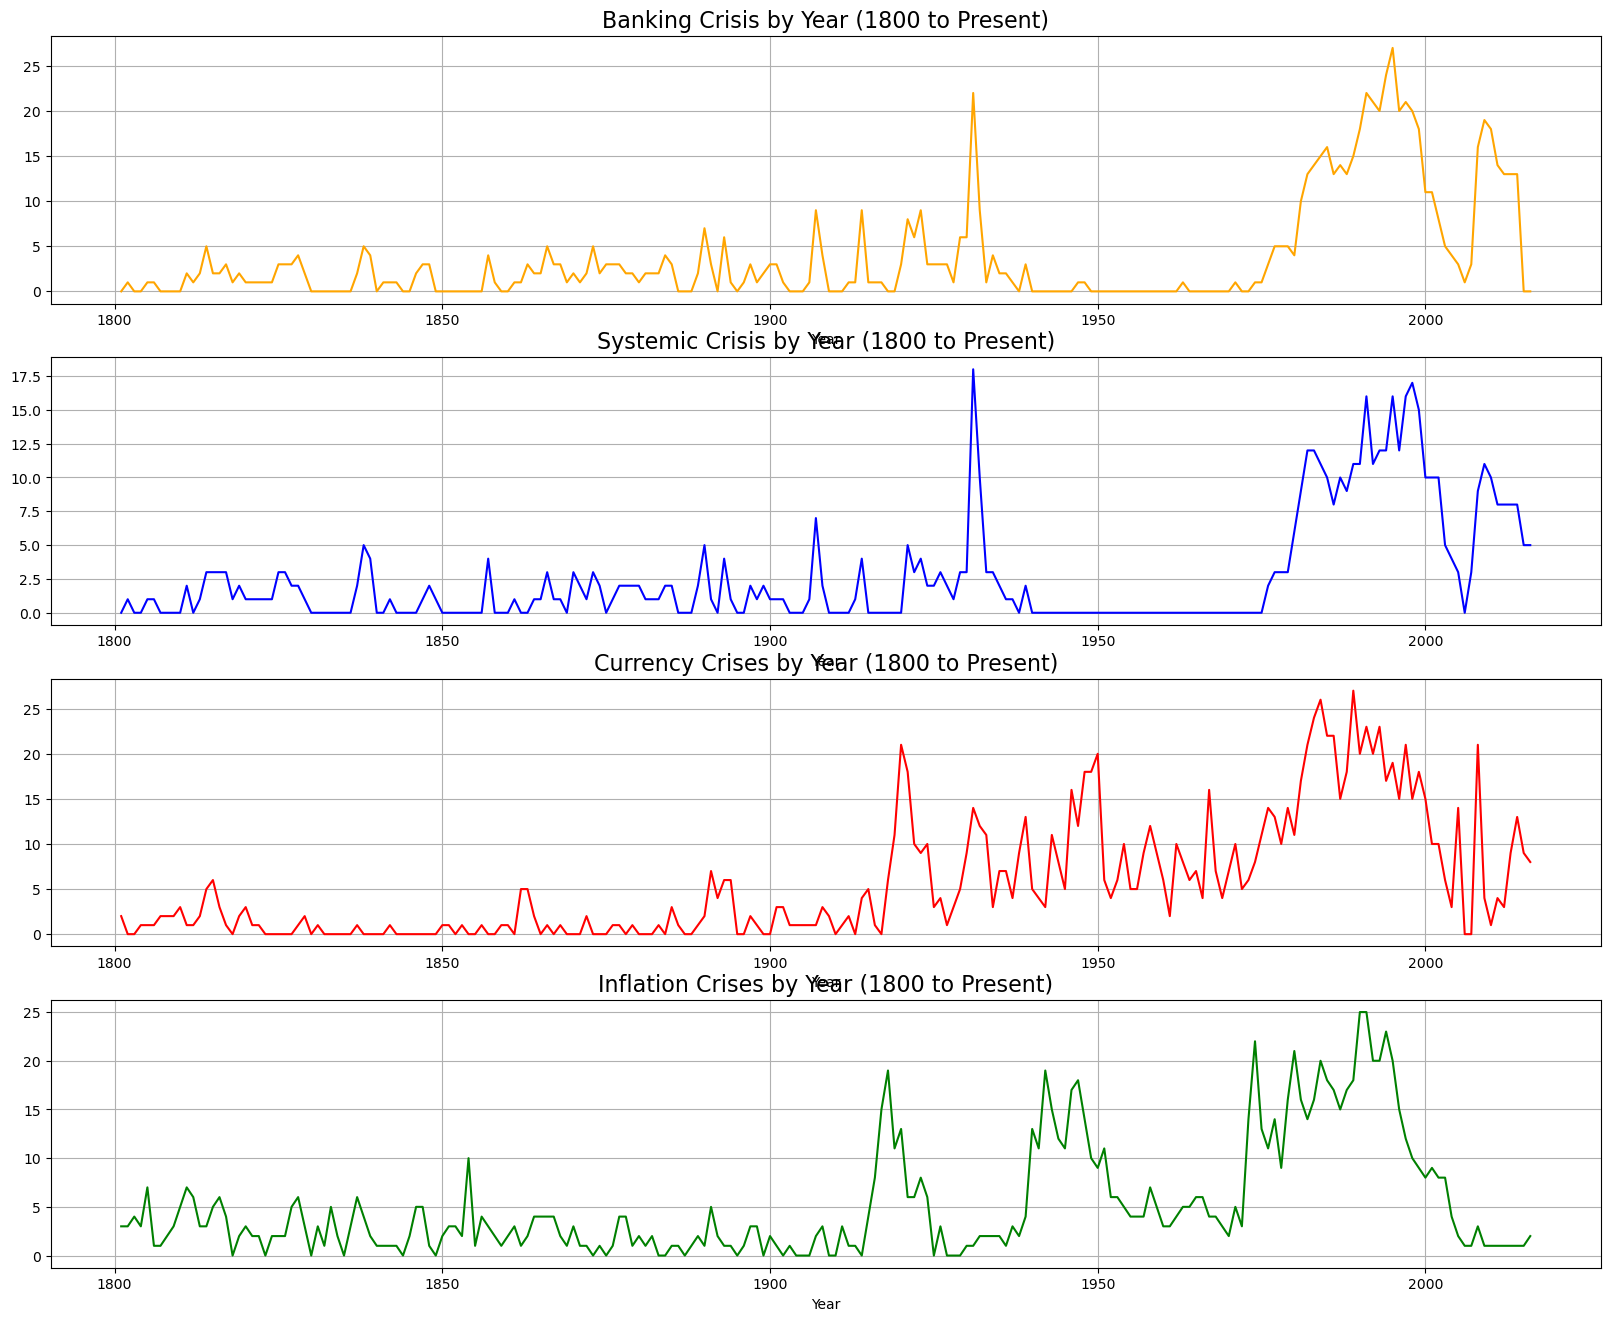

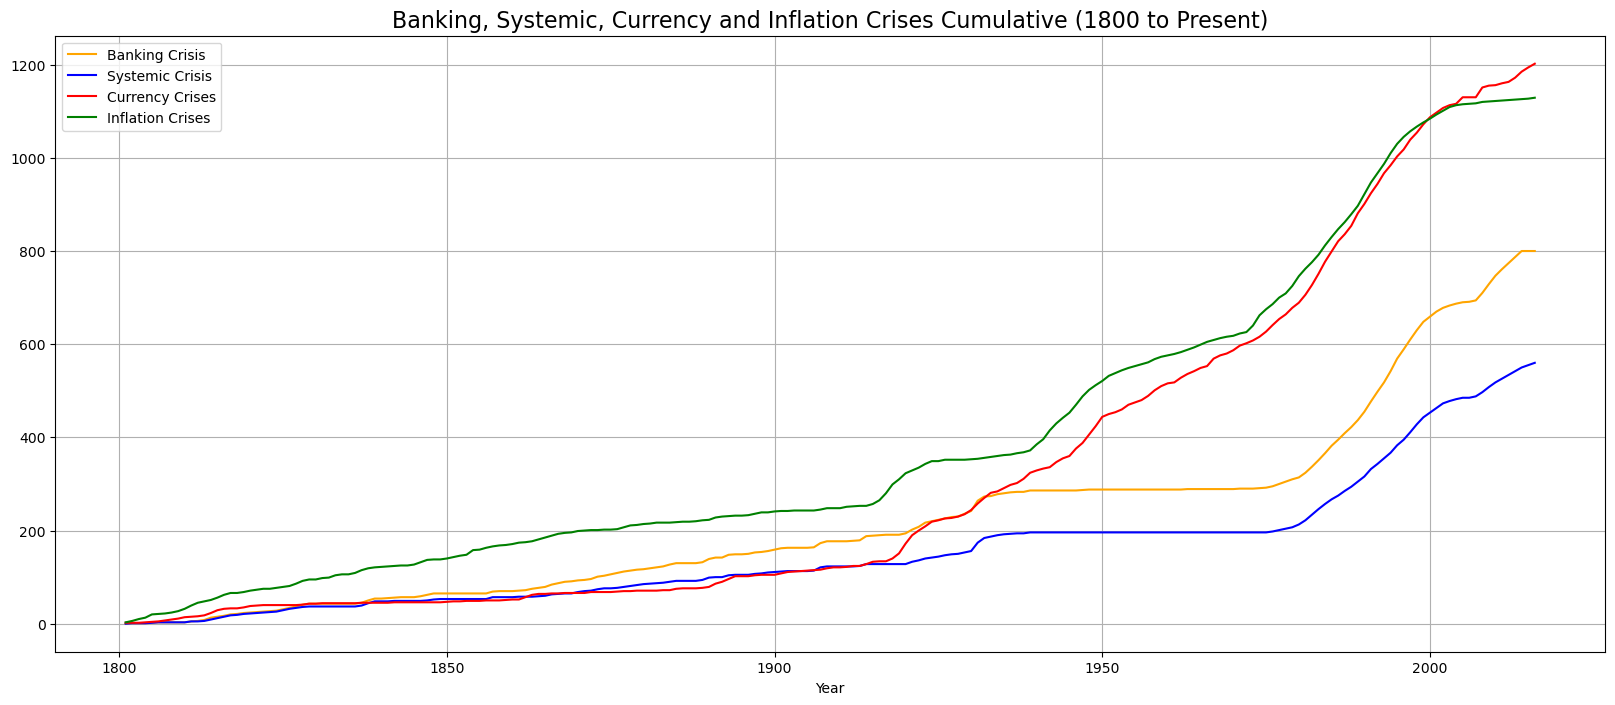

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(20, 16))

# First Part: Individual subplots for each crisis type by year
axs[0].set_title('Banking Crisis by Year (1800 to Present)', fontsize=16)
crisis_summary['Banking Crisis '].plot(kind='line', color='orange', ax=axs[0], grid=True)

axs[1].set_title('Systemic Crisis by Year (1800 to Present)', fontsize=16)
crisis_summary['Systemic Crisis'].plot(kind='line', color='blue', ax=axs[1], grid=True)

axs[2].set_title('Currency Crises by Year (1800 to Present)', fontsize=16)
crisis_summary['Currency Crises'].plot(kind='line', color='red', ax=axs[2], grid=True)

axs[3].set_title('Inflation Crises by Year (1800 to Present)', fontsize=16)
crisis_summary['Inflation Crises'].plot(kind='line', color='green', ax=axs[3], grid=True)

# Second Part: Cumulative summary
fig, ax2 = plt.subplots(1, 1, figsize=(20, 8))
ax2.set_title('Banking, Systemic, Currency and Inflation Crises Cumulative (1800 to Present)', fontsize=16)
crisis_cumulative_summary.plot(kind='line', color=['orange', 'blue', 'red', 'green'], ax=ax2, grid=True)
ax2.legend(loc='upper left')

plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare your data for 'Banking Crisis'
banking_crisis_target = crisis_data['Banking Crisis '].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
banking_crisis_features = crisis_data[['Systemic Crisis', 'Gold Standard', 'exch_usd', 'Inflation, Annual percentages of average consumer prices', 'Independence', 'Currency Crises', 'Inflation Crises']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
non_na_indices = banking_crisis_features.dropna().index
banking_crisis_features = banking_crisis_features.loc[non_na_indices]
banking_crisis_target = banking_crisis_target.loc[non_na_indices]

# Split data into training and testing sets for 'Banking Crisis'
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(banking_crisis_features, banking_crisis_target, test_size=0.2, random_state=42)

# Create and train the logistic regression model for 'Banking Crisis'
model_bc = LogisticRegression()
model_bc.fit(X_train_bc, y_train_bc)

# Make predictions for 'Banking Crisis'
predictions_bc = model_bc.predict(X_test_bc)

# Evaluate the model for 'Banking Crisis'
print("Banking Crisis Model Accuracy:", accuracy_score(y_test_bc, predictions_bc))
print("Banking Crisis Model Classification Report:\n", classification_report(y_test_bc, predictions_bc))


Banking Crisis Model Accuracy: 0.9478641103262697
Banking Crisis Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2818
           1       0.00      0.00      0.00       155

    accuracy                           0.95      2973
   macro avg       0.47      0.50      0.49      2973
weighted avg       0.90      0.95      0.92      2973



In [28]:
# Prepare your data for 'Systemic Crisis'
systemic_crisis_target = crisis_data['Systemic Crisis'].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
systemic_crisis_features = crisis_data[['Banking Crisis ', 'Gold Standard', 'exch_usd', 'Inflation, Annual percentages of average consumer prices', 'Independence', 'Currency Crises', 'Inflation Crises']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
non_na_indices = systemic_crisis_features.dropna().index
systemic_crisis_features = systemic_crisis_features.loc[non_na_indices]
systemic_crisis_target = systemic_crisis_target.loc[non_na_indices]

# Split data into training and testing sets for 'Systemic Crisis'
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(systemic_crisis_features, systemic_crisis_target, test_size=0.2, random_state=42)

# Create and train the logistic regression model for 'Systemic Crisis'
model_sc = LogisticRegression()
model_sc.fit(X_train_sc, y_train_sc)

# Make predictions for 'Systemic Crisis'
predictions_sc = model_sc.predict(X_test_sc)

# Evaluate the model for 'Systemic Crisis'
print("Systemic Crisis Model Accuracy:", accuracy_score(y_test_sc, predictions_sc))
print("Systemic Crisis Model Classification Report:\n", classification_report(y_test_sc, predictions_sc))


Systemic Crisis Model Accuracy: 0.9781365623948873
Systemic Crisis Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2858
           1       0.69      0.80      0.74       115

    accuracy                           0.98      2973
   macro avg       0.84      0.89      0.86      2973
weighted avg       0.98      0.98      0.98      2973



In [29]:
# Prepare your data for 'Currency Crises'
currency_crisis_target = crisis_data['Currency Crises'].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
currency_crisis_features = crisis_data[['Banking Crisis ','Systemic Crisis', 'Gold Standard', 'exch_usd', 'Inflation, Annual percentages of average consumer prices', 'Independence', 'Inflation Crises']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
non_na_indices = currency_crisis_features.dropna().index
currency_crisis_features = currency_crisis_features.loc[non_na_indices]
currency_crisis_target = currency_crisis_target.loc[non_na_indices]

# Split data into training and testing sets for 'Currency Crises'
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(currency_crisis_features, currency_crisis_target, test_size=0.2, random_state=42)

# Create and train the logistic regression model for 'Currency Crises'
model_bc = LogisticRegression()
model_bc.fit(X_train_bc, y_train_bc)

# Make predictions for 'Currency Crisis'
predictions_bc = model_bc.predict(X_test_bc)

# Evaluate the model for 'Currency Crisis'
print("Currency Crisis Model Accuracy:", accuracy_score(y_test_bc, predictions_bc))
print("Currency Crisis Model Classification Report:\n", classification_report(y_test_bc, predictions_bc))

Currency Crisis Model Accuracy: 0.9216279852001346
Currency Crisis Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      2737
           1       0.53      0.04      0.08       232
           2       0.00      0.00      0.00         4

    accuracy                           0.92      2973
   macro avg       0.48      0.35      0.35      2973
weighted avg       0.89      0.92      0.89      2973



In [30]:
# Prepare your data for 'Inflation Crises'
inflation_crisis_target = crisis_data['Inflation Crises'].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
inflation_crisis_features = crisis_data[['Banking Crisis ','Systemic Crisis', 'Gold Standard', 'exch_usd', 'Inflation, Annual percentages of average consumer prices', 'Independence', 'Currency Crises']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
non_na_indices = currency_crisis_features.dropna().index
inflation_crisis_features = inflation_crisis_features.loc[non_na_indices]
inflation_crisis_target = inflation_crisis_target.loc[non_na_indices]

# Split data into training and testing sets for 'Inflation Crises'
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(inflation_crisis_features, inflation_crisis_target, test_size=0.2, random_state=42)

# Create and train the logistic regression model for 'Inflation Crises'
model_bc = LogisticRegression()
model_bc.fit(X_train_bc, y_train_bc)

# Make predictions for 'Inflation Crisis'
predictions_bc = model_bc.predict(X_test_bc)

# Evaluate the model for 'Inflation Crisis'
print("Inflation Crisis Model Accuracy:", accuracy_score(y_test_bc, predictions_bc))
print("Inflation Crisis Model Classification Report:\n", classification_report(y_test_bc, predictions_bc))

Inflation Crisis Model Accuracy: 0.9926000672721157
Inflation Crisis Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2746
           1       0.96      0.94      0.95       227

    accuracy                           0.99      2973
   macro avg       0.98      0.97      0.97      2973
weighted avg       0.99      0.99      0.99      2973



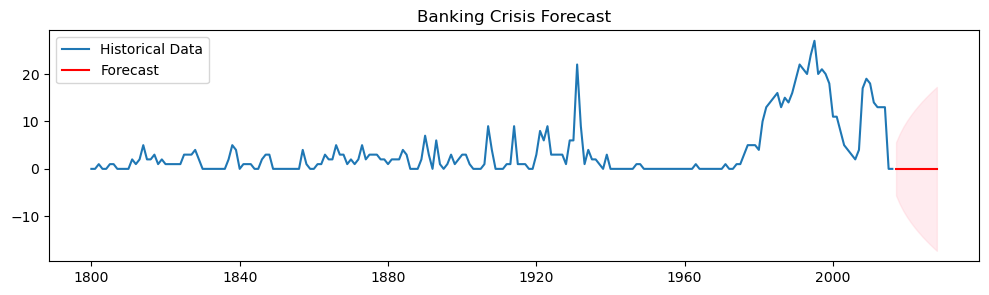

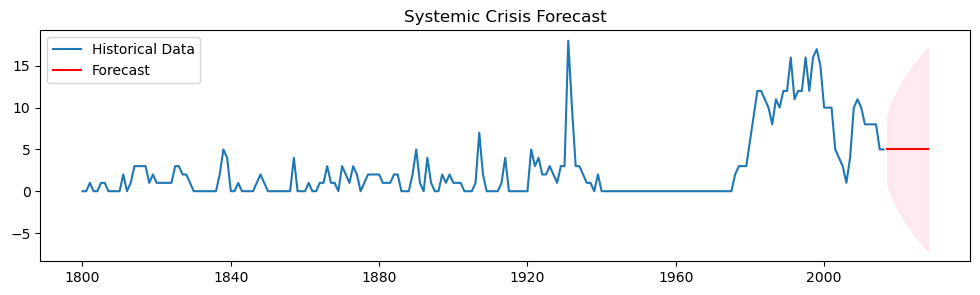

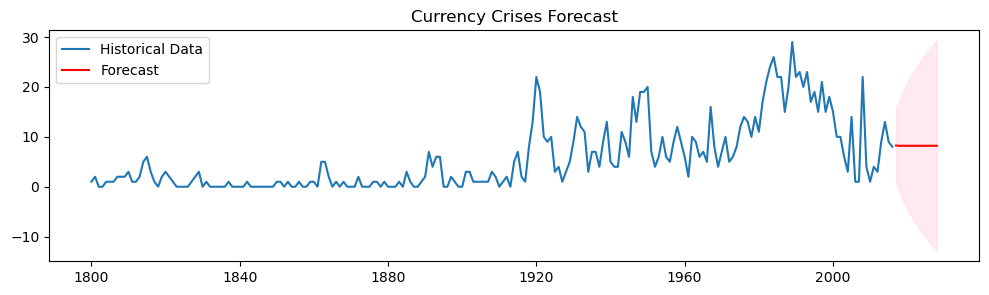

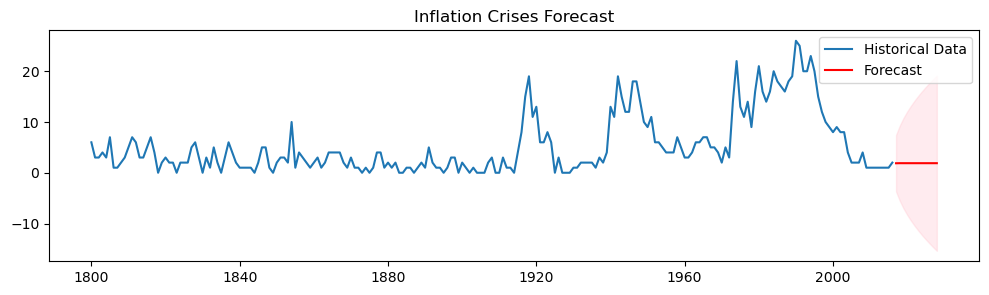

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
dataset_path = r'C:\Users\dhars\Desktop\TRIMESTER 1\Z-Major Project T1\Dataset\20160923_global_crisis_data.csv'
crisis_data = pd.read_csv(dataset_path)

# Data cleaning
crisis_data = crisis_data.drop(0)  # drop the first row if it is not part of the data
crisis_data['Year'] = pd.to_datetime(crisis_data['Year'], format='%Y')  # convert 'Year' to datetime
crisis_data.set_index('Year', inplace=True)  # set 'Year' as the index

# Correct column names based on the actual column names in the dataset
crisis_columns = [
    'Banking Crisis ',  # Notice the space at the end
    'Systemic Crisis',
    'Currency Crises',
    'Inflation Crises'
]

# Convert crisis columns to numeric and handle missing values
for col in crisis_columns:
    crisis_data[col] = pd.to_numeric(crisis_data[col], errors='coerce')

# Aggregate the data to have one observation per year
crisis_data_aggregated = crisis_data.groupby(crisis_data.index).sum()

# Define a function to perform ARIMA forecasting and plotting
def forecast_arima(series, order, title):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    forecast = model_fit.get_forecast(steps=12)
    forecast_index = pd.date_range(series.index[-1], periods=12, freq='A')  # Annual frequency

    plt.figure(figsize=(12, 3))
    plt.plot(series, label='Historical Data')
    plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                     forecast.conf_int().iloc[:, 0],
                     forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
    plt.title(title)
    plt.legend()
    plt.show()

# Forecast each type of crisis using the ARIMA model
arima_orders = {
    'Banking Crisis ': (1, 1, 0),
    'Systemic Crisis': (1, 1, 0),
    'Currency Crises': (1, 1, 0),
    'Inflation Crises': (1, 1, 0)
}

for crisis_type, order in arima_orders.items():
    forecast_arima(crisis_data_aggregated[crisis_type], order, f"{crisis_type.strip()} Forecast")


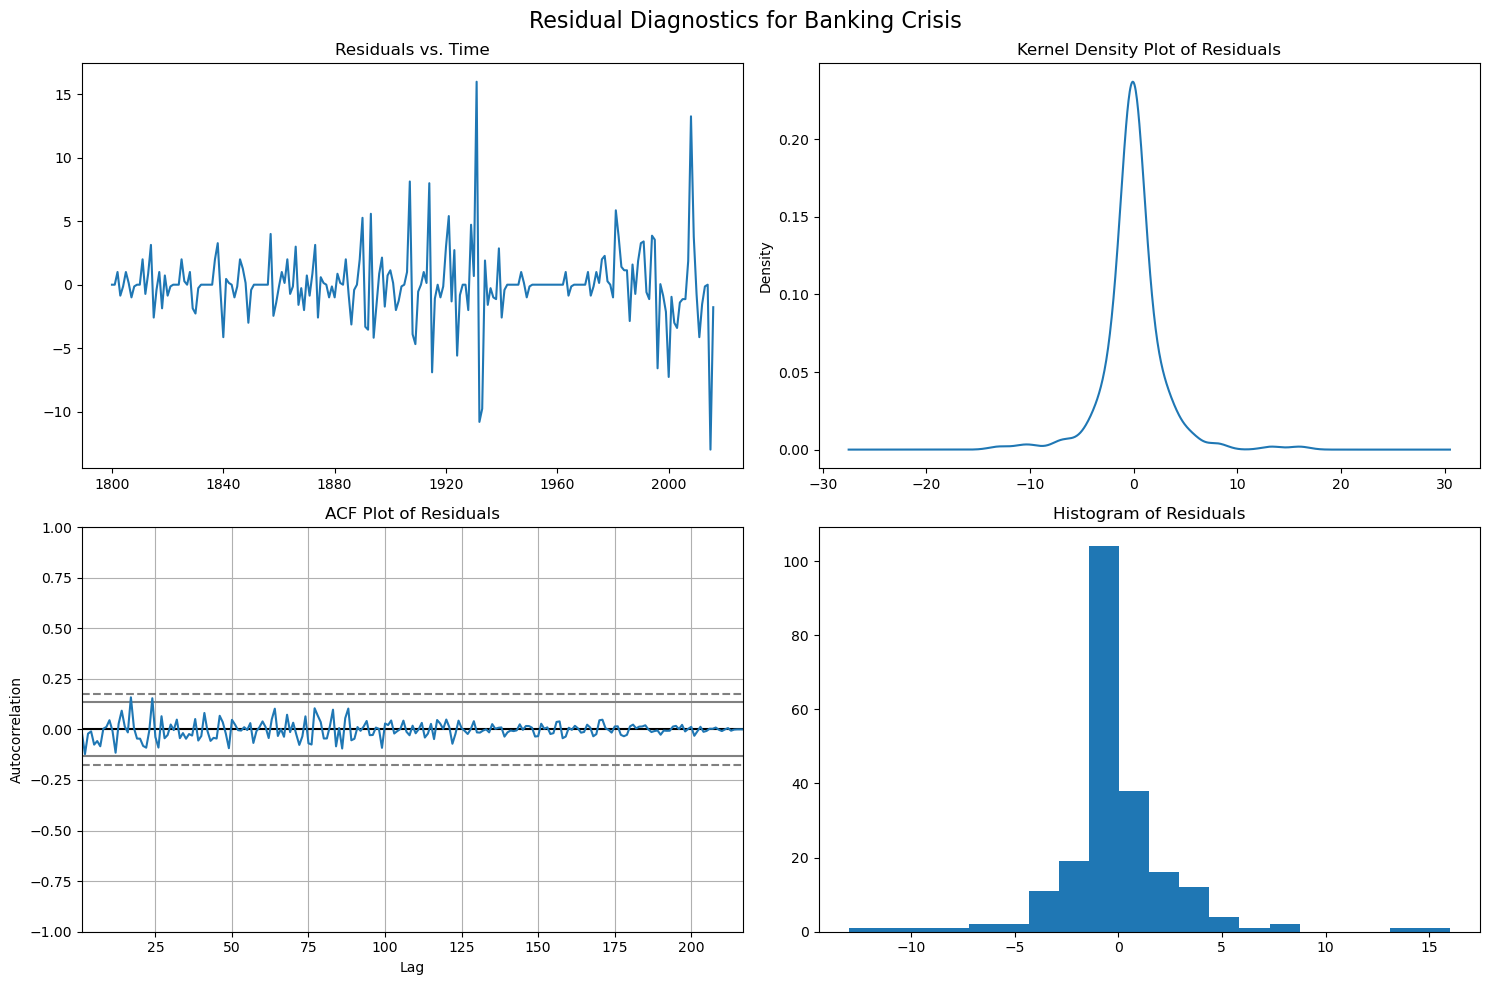

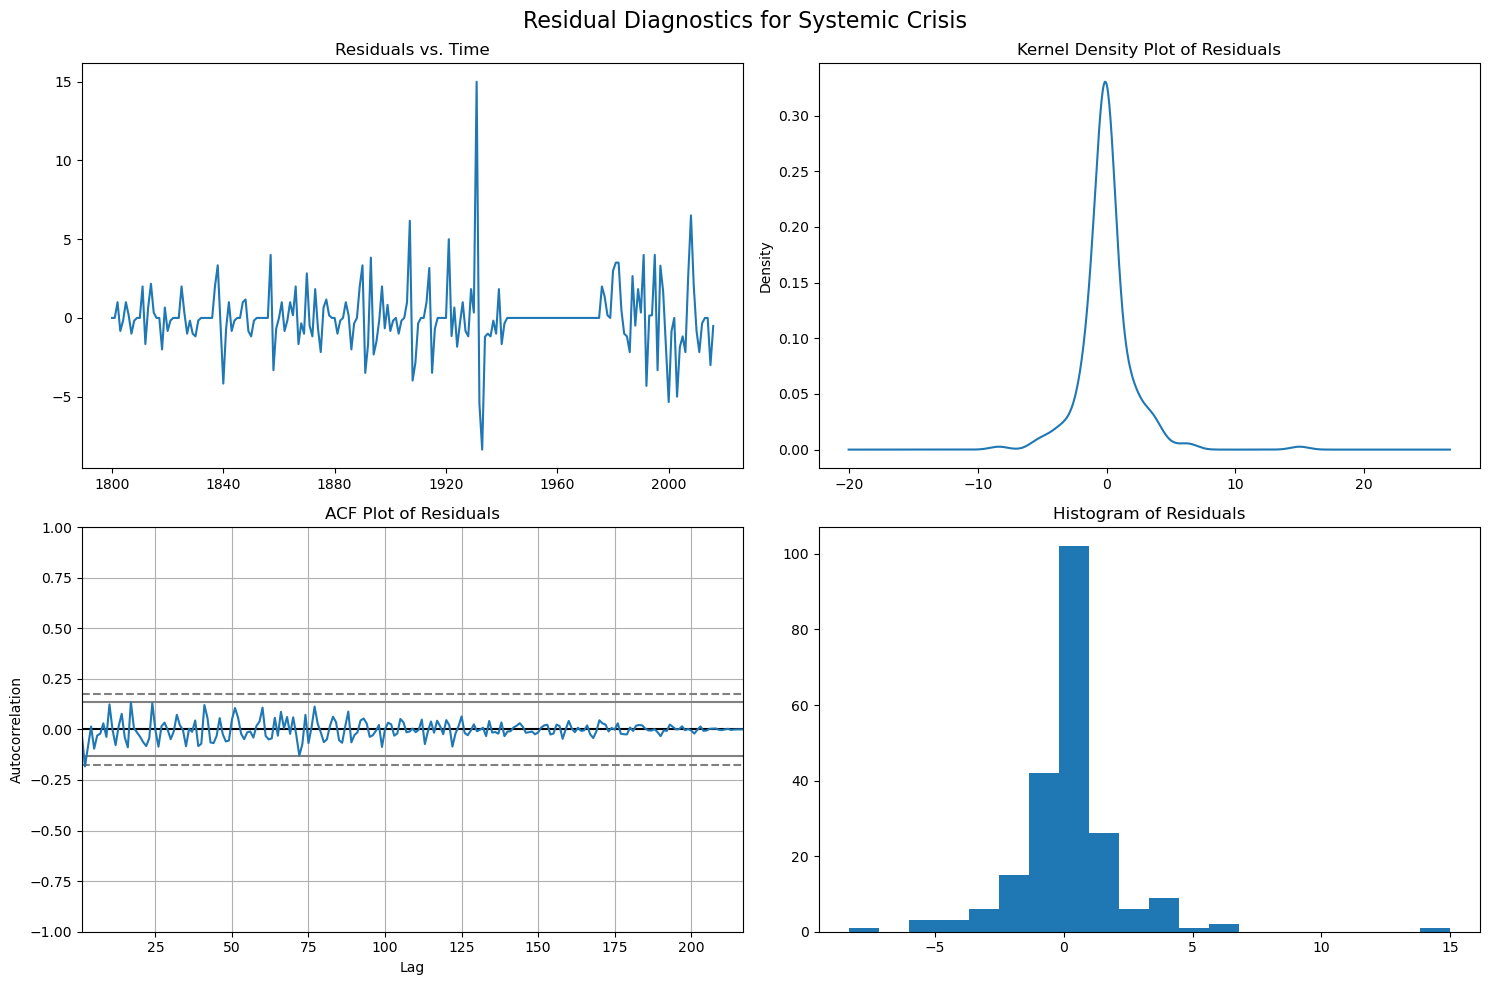

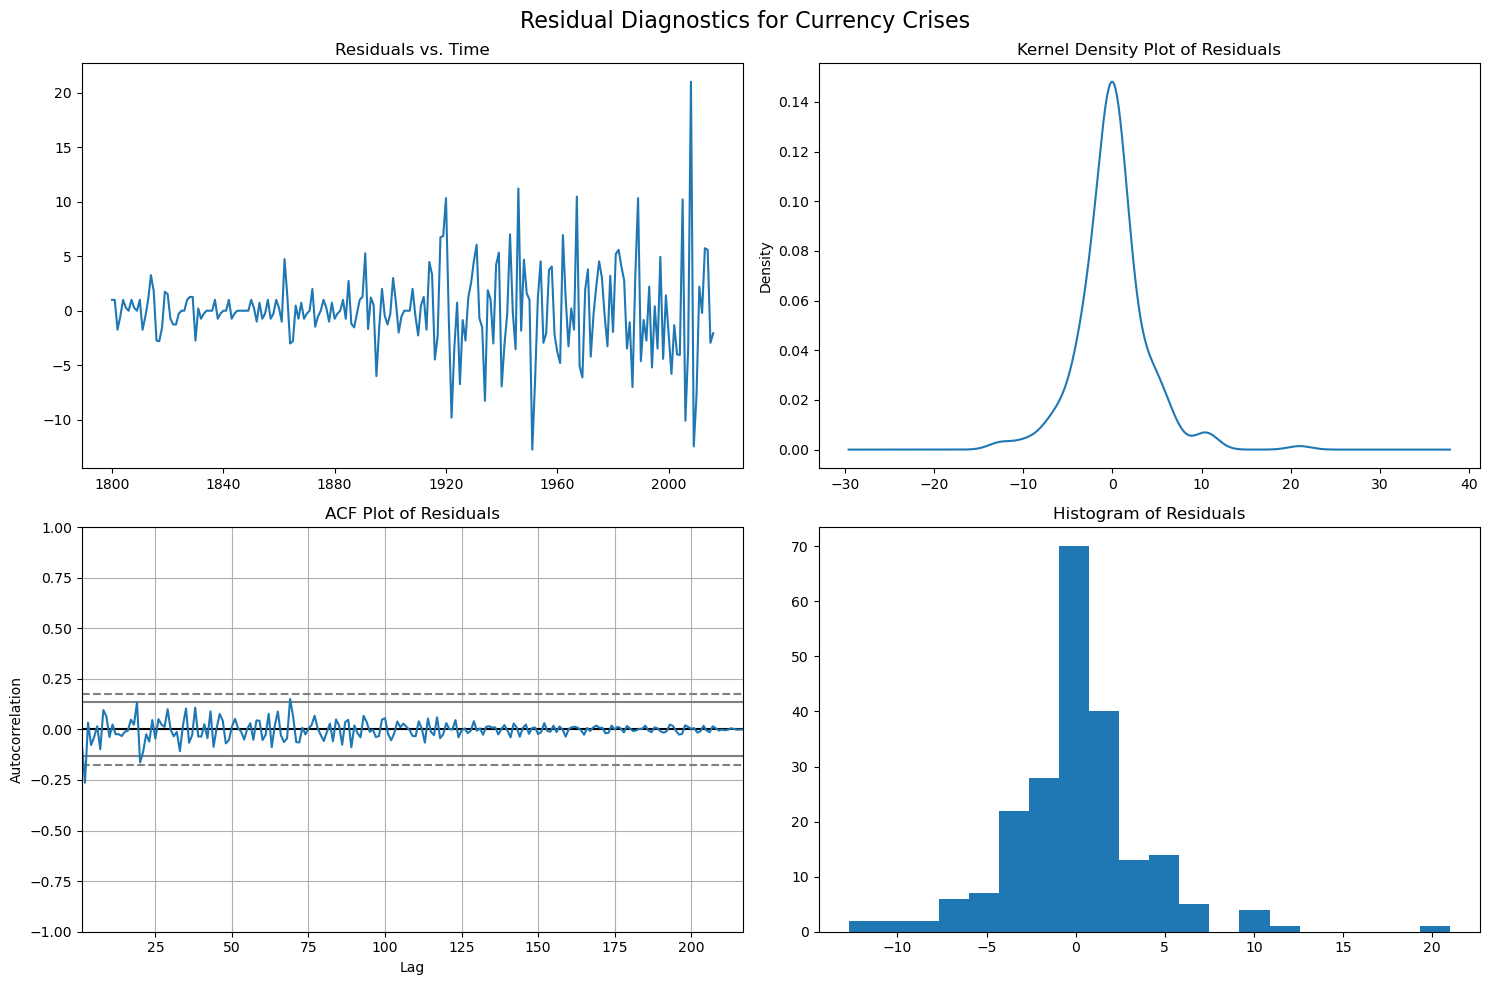

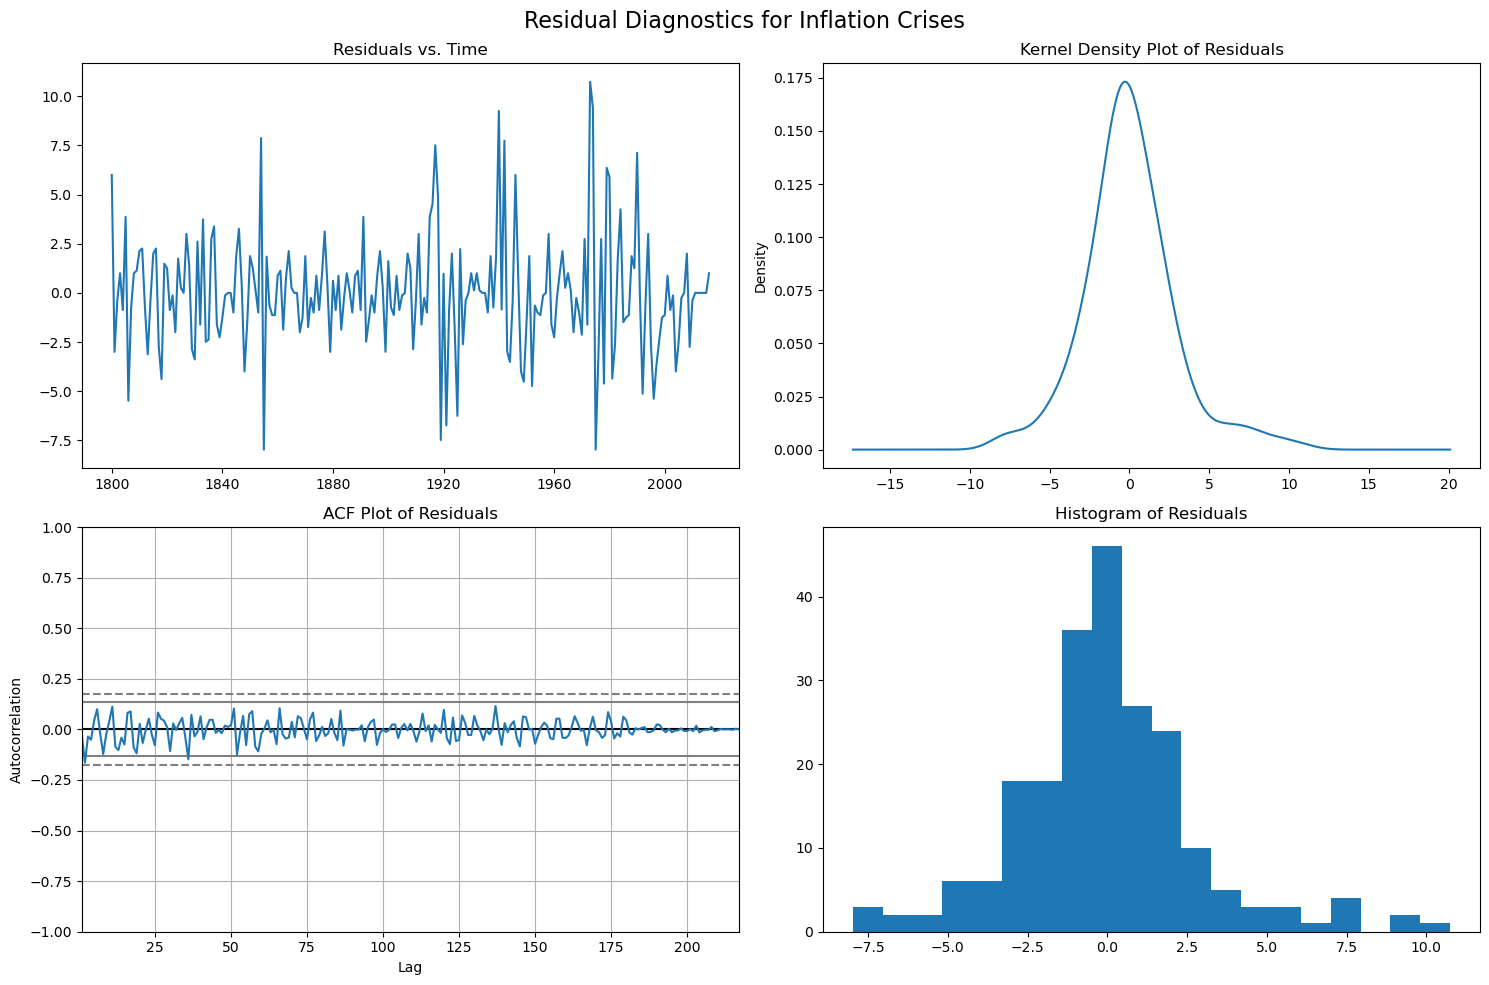

In [32]:
import warnings
warnings.filterwarnings('ignore')

# Define a function to generate and plot residual diagnostics for ARIMA models
def plot_residuals(series, order, title):
    # Fit the ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    
    # Get residuals
    residuals = model_fit.resid
    
    # Create subplots for residual diagnostics
    plt.figure(figsize=(15, 10))
    
    # Residuals vs. Time Plot
    plt.subplot(2, 2, 1)
    plt.plot(residuals)
    plt.title('Residuals vs. Time')
    
    # Kernel Density Plot of Residuals
    plt.subplot(2, 2, 2)
    residuals.plot(kind='kde')
    plt.title('Kernel Density Plot of Residuals')
    
    # ACF Plot of Residuals
    plt.subplot(2, 2, 3)
    pd.plotting.autocorrelation_plot(residuals)
    plt.title('ACF Plot of Residuals')
    
    # Histogram of Residuals
    plt.subplot(2, 2, 4)
    plt.hist(residuals, bins=20)
    plt.title('Histogram of Residuals')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Define ARIMA order parameters for each crisis type
arima_orders_corrected = {
    'Banking Crisis ': (1, 1, 0),  # Replace with appropriate values
    'Systemic Crisis': (1, 1, 0),  # Replace with appropriate values
    'Currency Crises': (1, 1, 0),  # Replace with appropriate values
    'Inflation Crises': (1, 1, 0)  # Replace with appropriate values
}

# Plot residuals for each type of crisis using the ARIMA models
for crisis_type, order in arima_orders_corrected.items():
    plot_residuals(crisis_data_aggregated[crisis_type], order, f"Residual Diagnostics for {crisis_type.strip()}")


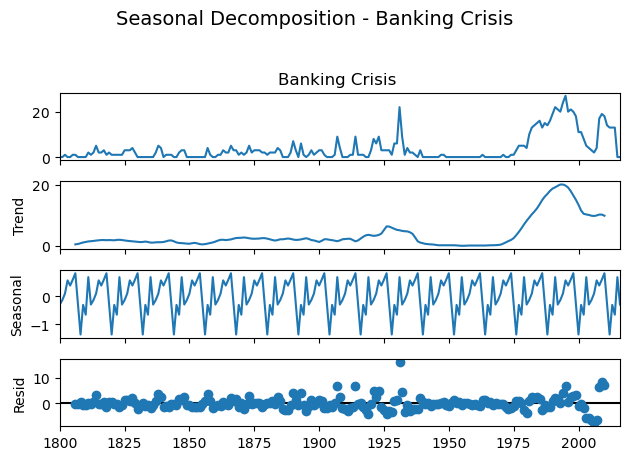

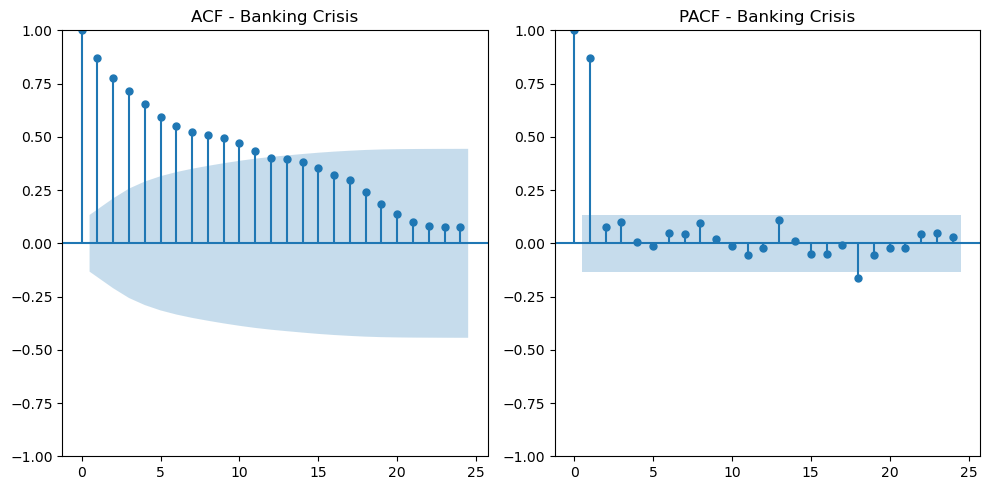

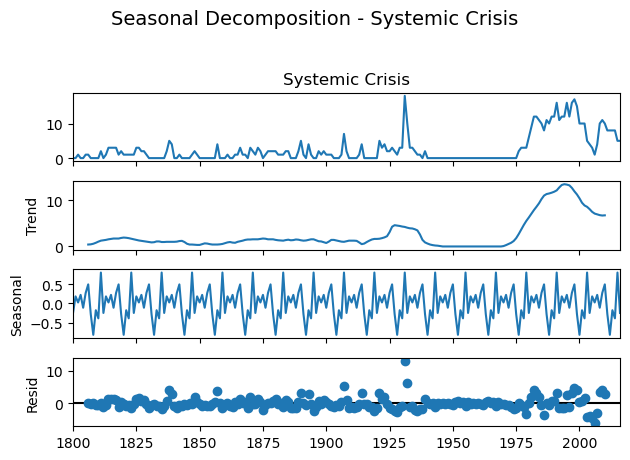

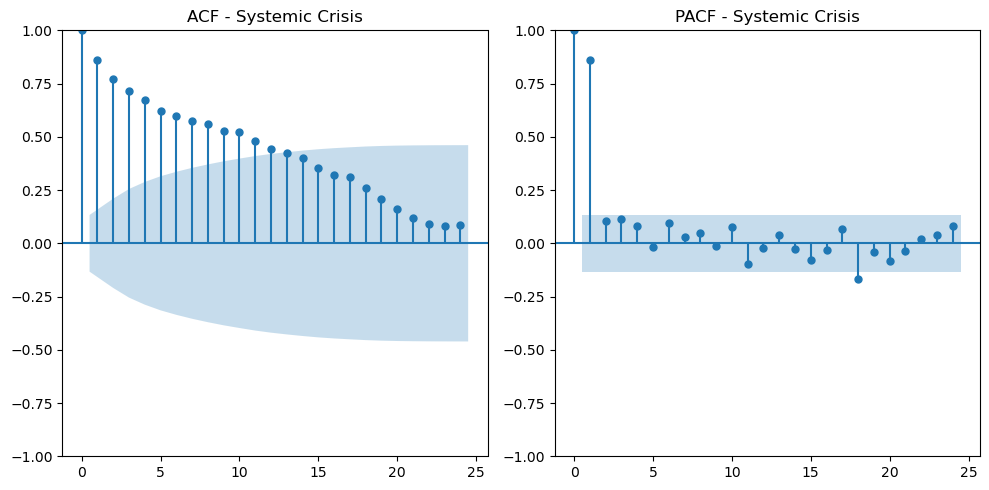

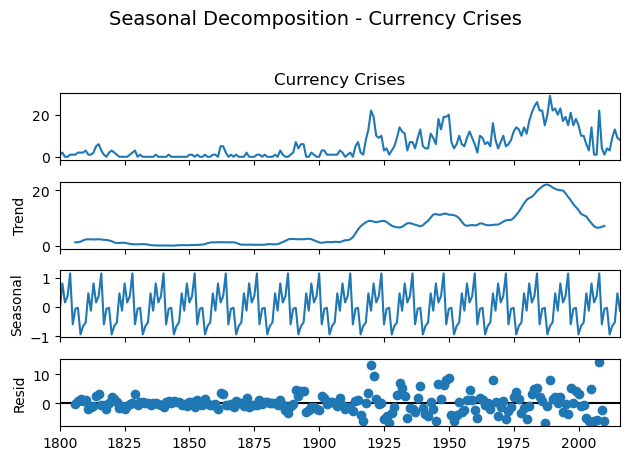

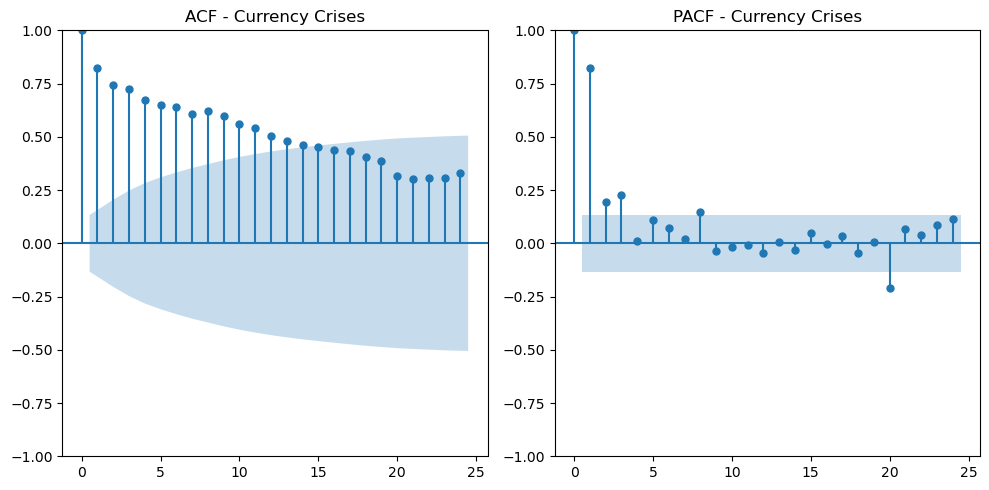

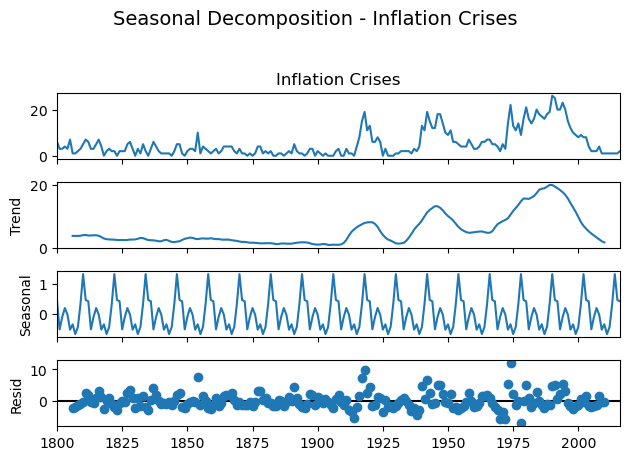

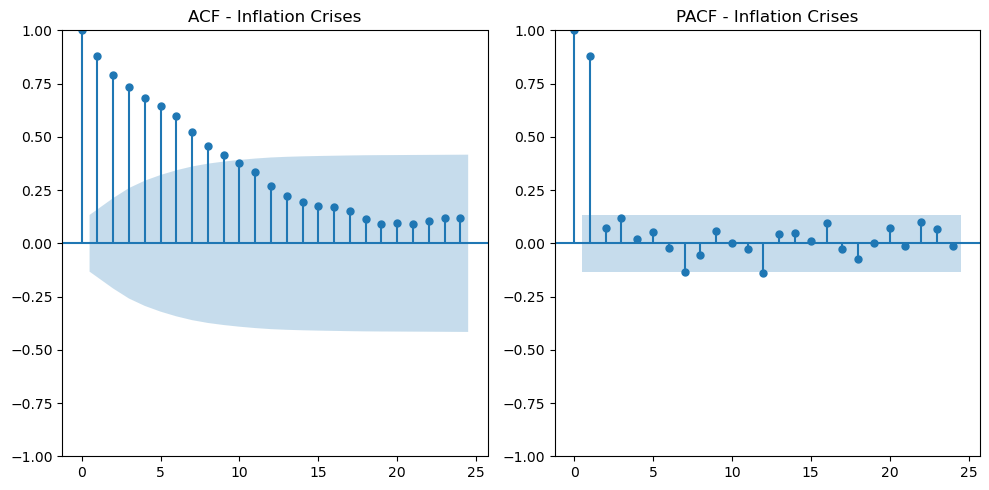

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
dataset_path = r'C:\Users\dhars\Desktop\TRIMESTER 1\Z-Major Project T1\Dataset\20160923_global_crisis_data.csv'
crisis_data = pd.read_csv(dataset_path)

# Convert crisis columns to numeric and handle non-numeric values
crisis_columns = ['Banking Crisis ', 'Systemic Crisis', 'Currency Crises', 'Inflation Crises']
for col in crisis_columns:
    crisis_data[col] = pd.to_numeric(crisis_data[col], errors='coerce')
crisis_data.fillna(0, inplace=True)  # Assuming no crisis is represented as missing values

# Filter data for years from 1800 onwards
crisis_data = crisis_data[crisis_data['Year'] >= 1800]

# Aggregate data for each crisis type by year
crisis_data_aggregated = {
    'Banking Crisis': crisis_data.groupby('Year')['Banking Crisis '].sum(),
    'Systemic Crisis': crisis_data.groupby('Year')['Systemic Crisis'].sum(),
    'Currency Crises': crisis_data.groupby('Year')['Currency Crises'].sum(),
    'Inflation Crises': crisis_data.groupby('Year')['Inflation Crises'].sum()
}

# Function to plot seasonal decomposition and ACF/PACF
def plot_seasonal_decomposition(crisis_type, series):
    # Seasonal Decomposition
    result = seasonal_decompose(series, model='additive', period=12)
    fig = result.plot()
    plt.suptitle(f'Seasonal Decomposition - {crisis_type}', fontsize=14)

    # Adjusting layout to prevent overlapping
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust these values as needed

    # ACF and PACF Plots
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plot_acf(series, ax=plt.gca(), title=f'ACF - {crisis_type}')
    plt.subplot(122)
    plot_pacf(series, ax=plt.gca(), title=f'PACF - {crisis_type}')
    plt.tight_layout()  # Adjust layout here as well
    plt.show()

# Generate plots for each crisis type
for crisis_type, series in crisis_data_aggregated.items():
    plot_seasonal_decomposition(crisis_type, series)



Processing Banking Crisis...
Forecast for Banking Crisis:
2017-01-01    0.911939
2018-01-01    2.162879
2019-01-01    3.256398
2020-01-01    2.003605
2021-01-01    2.469982
2022-01-01    2.783063
2023-01-01    2.638830
2024-01-01    1.347632
2025-01-01    2.642180
2026-01-01    2.542724
2027-01-01    4.191799
2028-01-01    3.232535
Freq: AS-JAN, Name: predicted_mean, dtype: float64


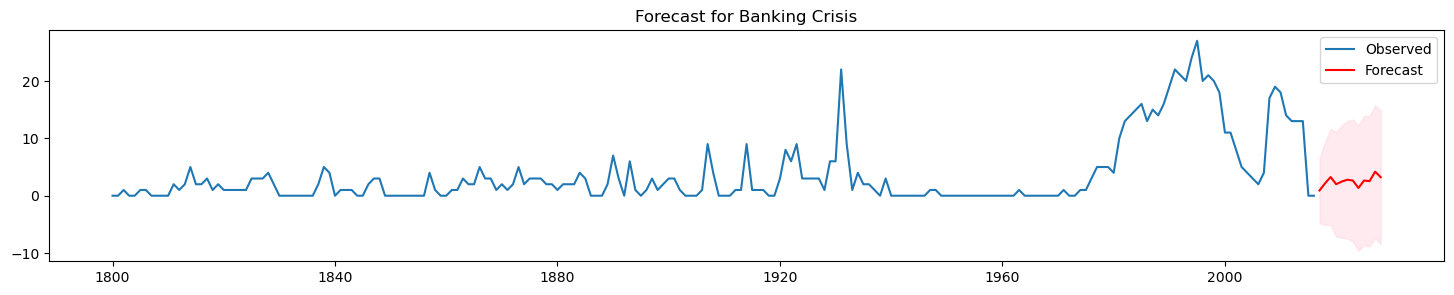

Processing Systemic Crisis...
Forecast for Systemic Crisis:
2017-01-01    5.212241
2018-01-01    5.070631
2019-01-01    4.811922
2020-01-01    3.854949
2021-01-01    4.072446
2022-01-01    4.220450
2023-01-01    3.500704
2024-01-01    2.814563
2025-01-01    3.339135
2026-01-01    3.032016
2027-01-01    4.215382
2028-01-01    3.090282
Freq: AS-JAN, Name: predicted_mean, dtype: float64


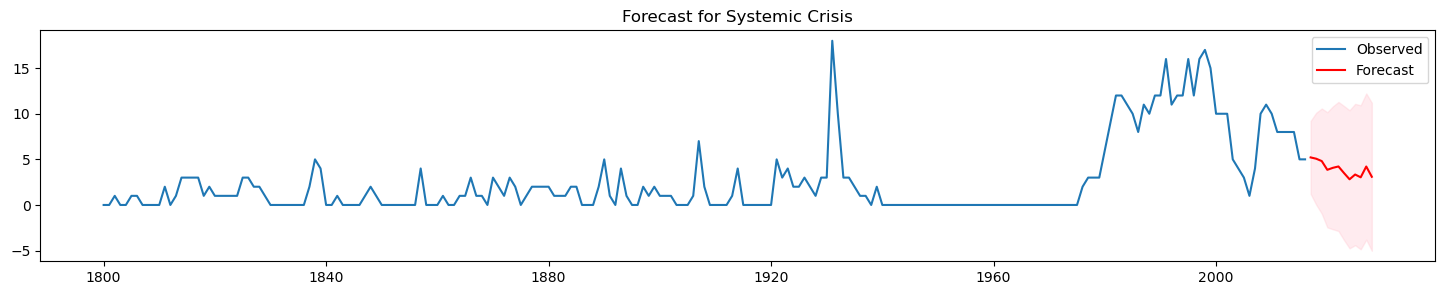

Processing Currency Crises...
Forecast for Currency Crises:
2017-01-01     9.925166
2018-01-01     8.379155
2019-01-01     8.643245
2020-01-01    10.490868
2021-01-01     7.841960
2022-01-01     8.144415
2023-01-01     7.895551
2024-01-01     6.907322
2025-01-01     7.925989
2026-01-01     8.165609
2027-01-01     8.841588
2028-01-01     7.616606
Freq: AS-JAN, Name: predicted_mean, dtype: float64


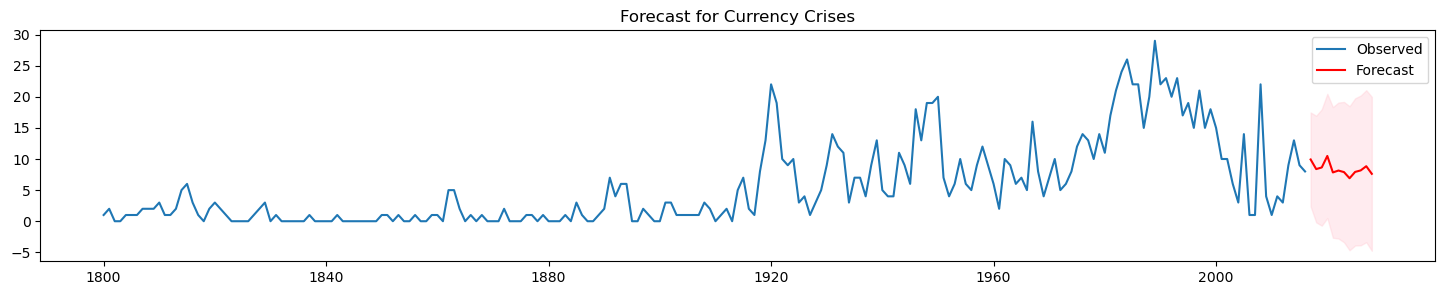

Processing Inflation Crises...
Forecast for Inflation Crises:
2017-01-01    1.281305
2018-01-01    2.000730
2019-01-01    2.632820
2020-01-01    2.466974
2021-01-01    2.586922
2022-01-01    2.765289
2023-01-01    2.608880
2024-01-01    3.026406
2025-01-01    3.963263
2026-01-01    5.120516
2027-01-01    4.366391
2028-01-01    4.452640
Freq: AS-JAN, Name: predicted_mean, dtype: float64


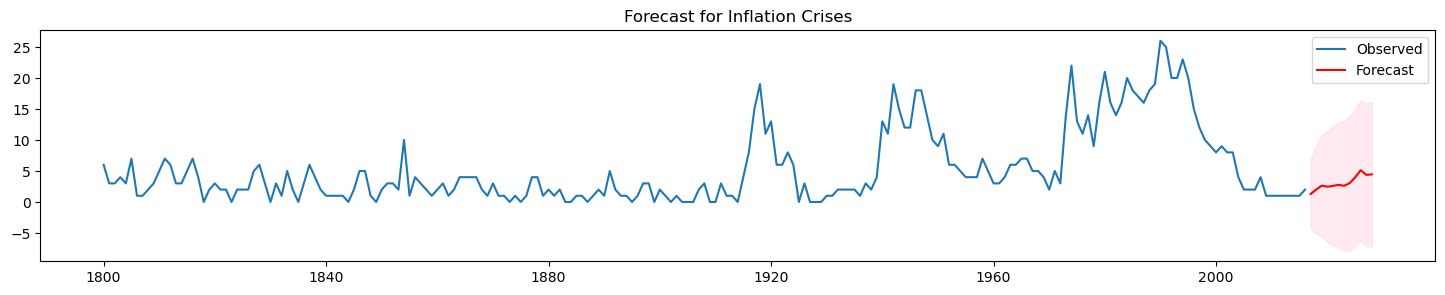

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
dataset_path = r'C:\Users\dhars\Desktop\TRIMESTER 1\Z-Major Project T1\Dataset\20160923_global_crisis_data.csv'
crisis_data = pd.read_csv(dataset_path)

# Convert crisis columns to numeric and handle non-numeric values
crisis_columns = ['Banking Crisis ', 'Systemic Crisis', 'Currency Crises', 'Inflation Crises']
for col in crisis_columns:
    crisis_data[col] = pd.to_numeric(crisis_data[col], errors='coerce')
crisis_data.fillna(0, inplace=True)  # Assuming no crisis is represented as missing values

# Filter data for years from 1800 onwards
crisis_data = crisis_data[crisis_data['Year'] >= 1800]

# Aggregate data for each crisis type by year and set 'Year' as index
crisis_data_aggregated = {
    'Banking Crisis': crisis_data.groupby('Year')['Banking Crisis '].sum(),
    'Systemic Crisis': crisis_data.groupby('Year')['Systemic Crisis'].sum(),
    'Currency Crises': crisis_data.groupby('Year')['Currency Crises'].sum(),
    'Inflation Crises': crisis_data.groupby('Year')['Inflation Crises'].sum()
}
for crisis_type in crisis_data_aggregated:
    crisis_data_aggregated[crisis_type].index = pd.to_datetime(crisis_data_aggregated[crisis_type].index, format='%Y')

# Define SARIMA orders for each crisis type (replace with your determined values)
sarima_orders = {
    'Banking Crisis': {'order': (1, 0, 1), 'seasonal_order': (1, 1, 1, 12)},
    'Systemic Crisis': {'order': (1, 0, 1), 'seasonal_order': (1, 1, 1, 12)},
    'Currency Crises': {'order': (1, 0, 1), 'seasonal_order': (1, 1, 1, 12)},
    'Inflation Crises': {'order': (1, 0, 1), 'seasonal_order': (1, 1, 1, 12)}
}

# Fit and forecast with SARIMA for each crisis type
for crisis_type, params in sarima_orders.items():
    print(f"Processing {crisis_type}...")
    series = crisis_data_aggregated[crisis_type]

    # Fit SARIMA model
    model = SARIMAX(series, order=params['order'], seasonal_order=params['seasonal_order'])
    results = model.fit()

    # Example of forecasting the next 12 periods
    forecast = results.get_forecast(steps=12)
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    print(f"Forecast for {crisis_type}:")
    print(forecast_values)

    # Optional: Plotting the forecast with confidence intervals
    plt.figure(figsize=(18, 3))
    plt.plot(series, label='Observed')
    plt.plot(forecast_values, label='Forecast', color='red')
    plt.fill_between(forecast_values.index, 
                     forecast_conf_int.iloc[:, 0], 
                     forecast_conf_int.iloc[:, 1], 
                     color='pink', alpha=0.3)
    plt.title(f"Forecast for {crisis_type}")
    plt.legend()
    plt.show()

Processing Banking Crisis...


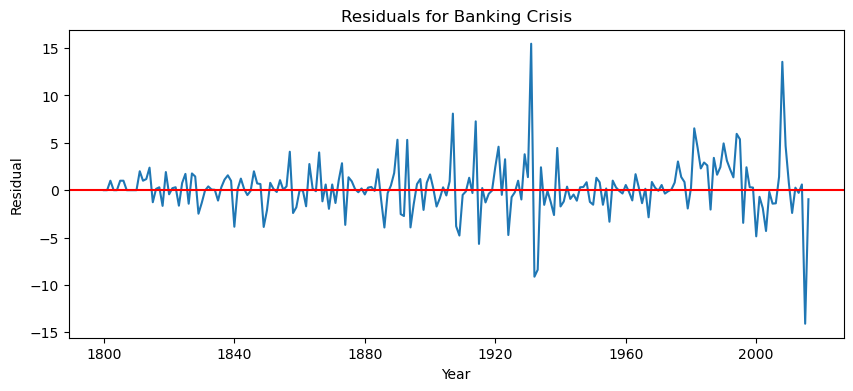

<Figure size 1000x400 with 0 Axes>

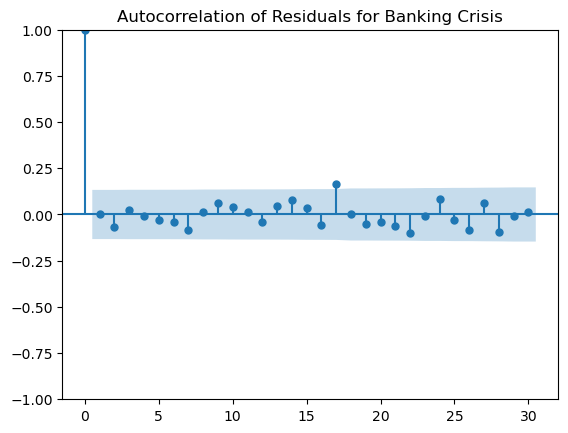

Ljung-Box test for Banking Crisis:
     lb_stat  lb_pvalue
10  4.567326   0.918148
Processing Systemic Crisis...


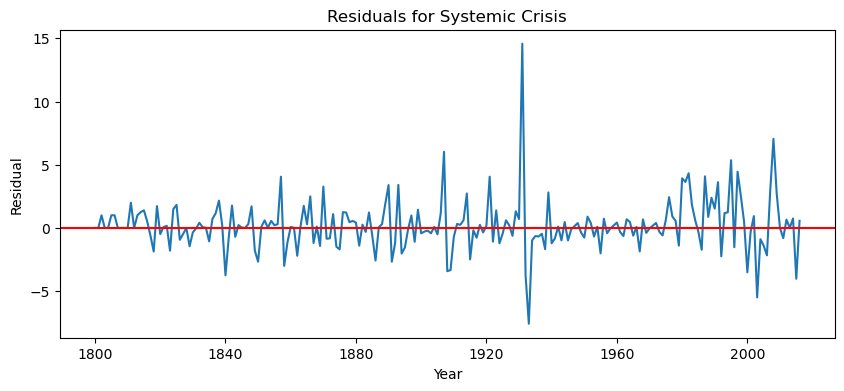

<Figure size 1000x400 with 0 Axes>

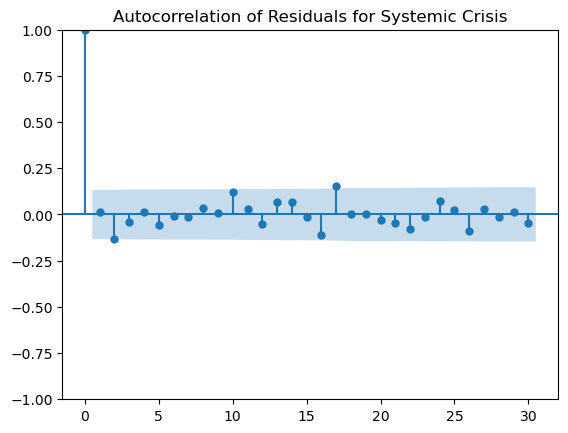

Ljung-Box test for Systemic Crisis:
     lb_stat  lb_pvalue
10  8.801854   0.551006
Processing Currency Crises...


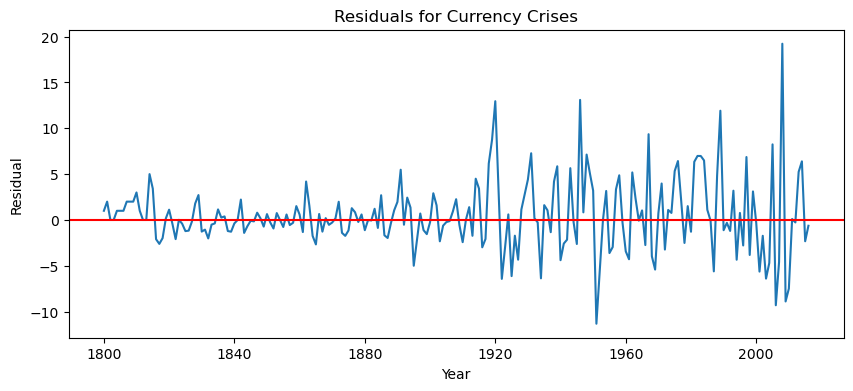

<Figure size 1000x400 with 0 Axes>

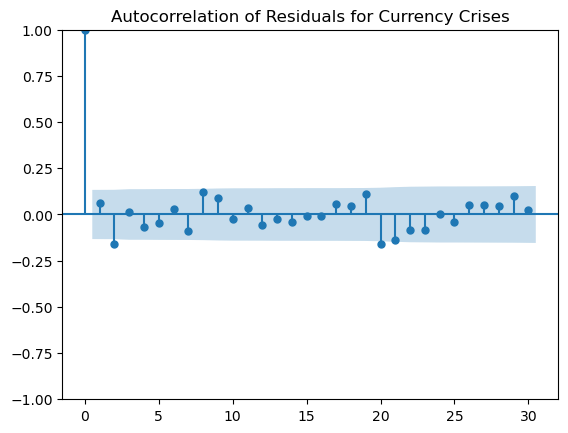

Ljung-Box test for Currency Crises:
      lb_stat  lb_pvalue
10  15.207412   0.124681
Processing Inflation Crises...


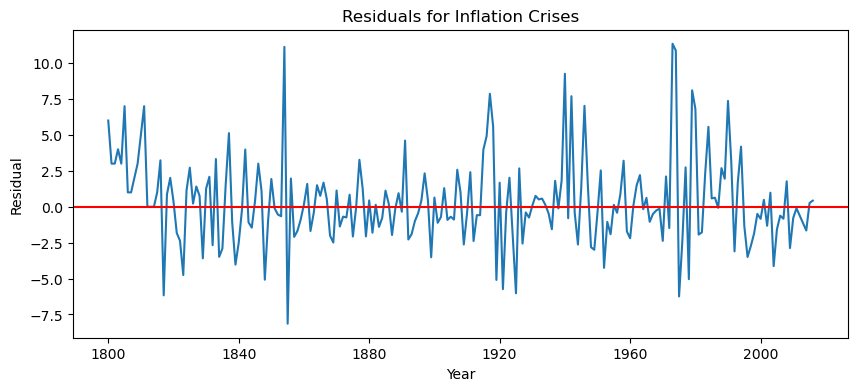

<Figure size 1000x400 with 0 Axes>

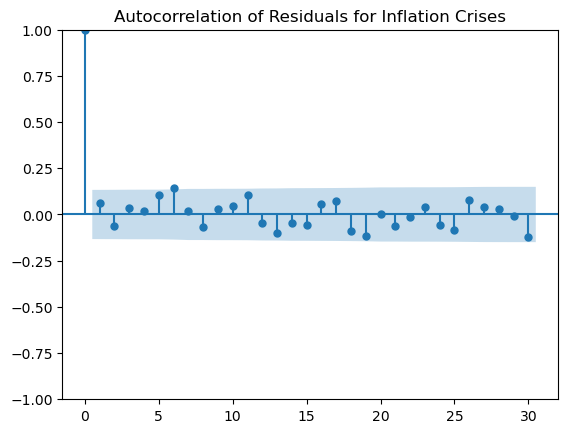

Ljung-Box test for Inflation Crises:
      lb_stat  lb_pvalue
10  10.910635   0.364523


In [35]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# After fitting the SARIMA model for each crisis type
for crisis_type, params in sarima_orders.items():
    print(f"Processing {crisis_type}...")
    series = crisis_data_aggregated[crisis_type]

    # Fit SARIMA model
    model = SARIMAX(series, order=params['order'], seasonal_order=params['seasonal_order'])
    results = model.fit()

    # Plotting residuals
    plt.figure(figsize=(10, 4))
    plt.plot(results.resid)
    plt.title(f'Residuals for {crisis_type}')
    plt.ylabel('Residual')
    plt.xlabel('Year')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

    # Autocorrelation plot of residuals
    plt.figure(figsize=(10, 4))
    plot_acf(results.resid, lags=30)
    plt.title(f'Autocorrelation of Residuals for {crisis_type}')
    plt.show()

    # Ljung-Box test
    lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
    print(f"Ljung-Box test for {crisis_type}:")
    print(lb_test)


Processing Banking Crisis ...


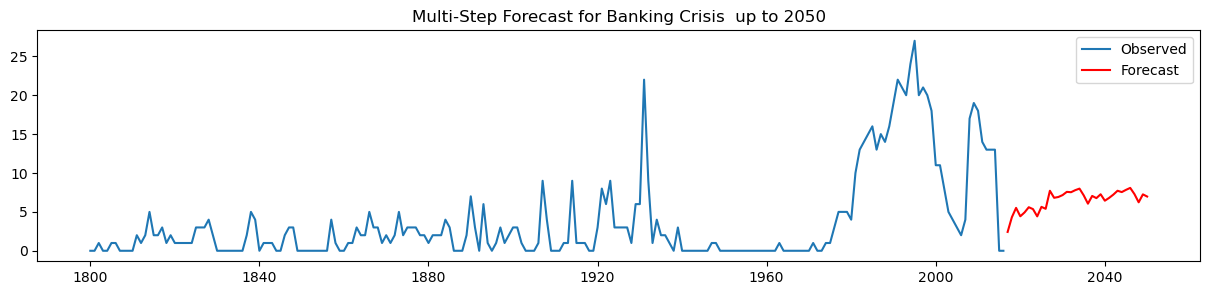

Processing Systemic Crisis...


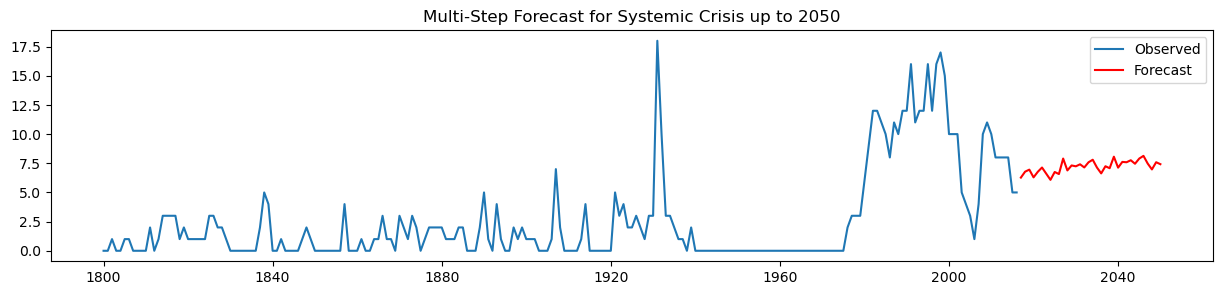

Processing Currency Crises...


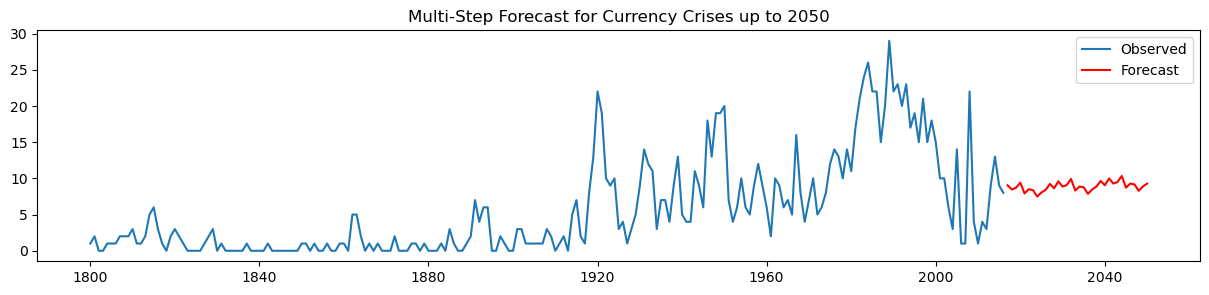

Processing Inflation Crises...


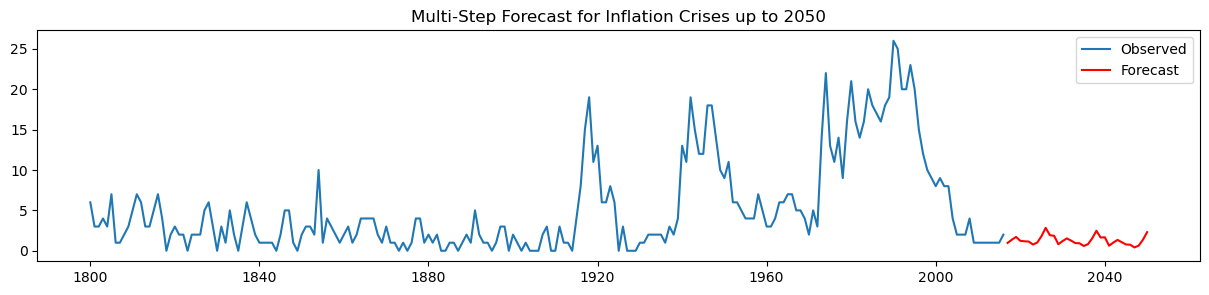

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
dataset_path = r'C:\Users\dhars\Desktop\TRIMESTER 1\Z-Major Project T1\Dataset\20160923_global_crisis_data.csv'
crisis_data = pd.read_csv(dataset_path)

# Convert relevant columns to numeric, assuming non-numeric entries indicate no crisis
crisis_columns = ['Banking Crisis ', 'Systemic Crisis', 'Currency Crises', 'Inflation Crises']
for col in crisis_columns:
    crisis_data[col] = pd.to_numeric(crisis_data[col], errors='coerce').fillna(0)

# Filter for years from 1800 onwards and aggregate data by year
crisis_data = crisis_data[crisis_data['Year'] >= 1800]
crisis_data['Year'] = pd.to_datetime(crisis_data['Year'], format='%Y')
crisis_data.set_index('Year', inplace=True)

# Aggregate data for each crisis type by year
crisis_data_aggregated = {
    'Banking Crisis ': crisis_data['Banking Crisis '].resample('YS').sum(),
    'Systemic Crisis': crisis_data['Systemic Crisis'].resample('YS').sum(),
    'Currency Crises': crisis_data['Currency Crises'].resample('YS').sum(),
    'Inflation Crises': crisis_data['Inflation Crises'].resample('YS').sum()
}

# Placeholder SARIMA orders (you should determine these from your analysis)
sarima_orders = {
    'Banking Crisis ': {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    'Systemic Crisis': {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    'Currency Crises': {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    'Inflation Crises': {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)}
}

# Forecasting up to the year 2100 for each crisis type
for crisis_type, params in sarima_orders.items():
    print(f"Processing {crisis_type}...")
    series = crisis_data_aggregated[crisis_type]

    # Fit the SARIMA model
    model = SARIMAX(series, order=params['order'], seasonal_order=params['seasonal_order'])
    results = model.fit()

    # Calculate the number of steps to forecast until the year 2100
    last_year = series.index[-1].year
    steps_to_2050 = 2050 - last_year

    # Multi-step forecast
    future_years = pd.date_range(start=series.index[-1] + pd.offsets.DateOffset(years=1), 
                                 end=pd.Timestamp(year=2050, month=1, day=1), 
                                 freq='YS')
    forecast_values = results.get_forecast(steps=len(future_years)).predicted_mean
    forecast_values.index = future_years

    # Plotting the forecast
    plt.figure(figsize=(15, 3))
    plt.plot(series.index, series, label='Observed')
    plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
    plt.title(f"Multi-Step Forecast for {crisis_type} up to 2050")
    plt.legend()
    plt.show()

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Select one crisis type for demonstration. Here, using 'Banking Crisis' as an example
data = crisis_data_aggregated['Banking Crisis '].values
data = data.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
look_back = 1
train_size = int(len(data_scaled) * 0.67)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create and fit the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
print('Banking Crisis - Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Banking Crisis - Test Score: %.2f RMSE' % (test_score))




Epoch 1/100

143/143 - 1s - loss: 0.0100 - 1s/epoch - 10ms/step
Epoch 2/100
143/143 - 0s - loss: 0.0089 - 158ms/epoch - 1ms/step
Epoch 3/100
143/143 - 0s - loss: 0.0087 - 179ms/epoch - 1ms/step
Epoch 4/100
143/143 - 0s - loss: 0.0087 - 162ms/epoch - 1ms/step
Epoch 5/100
143/143 - 0s - loss: 0.0086 - 170ms/epoch - 1ms/step
Epoch 6/100
143/143 - 0s - loss: 0.0085 - 166ms/epoch - 1ms/step
Epoch 7/100
143/143 - 0s - loss: 0.0085 - 168ms/epoch - 1ms/step
Epoch 8/100
143/143 - 0s - loss: 0.0084 - 170ms/epoch - 1ms/step
Epoch 9/100
143/143 - 0s - loss: 0.0084 - 172ms/epoch - 1ms/step
Epoch 10/100
143/143 - 0s - loss: 0.0084 - 170ms/epoch - 1ms/step
Epoch 11/100
143/143 - 0s - loss: 0.0083 - 168ms/epoch - 1ms/step
Epoch 12/100
143/143 - 0s - loss: 0.0083 - 170ms/epoch - 1ms/step
Epoch 13/100
143/143 - 0s - loss: 0.0082 - 169ms/epoch - 1ms/step
Epoch 14/100
143/143 - 0s - loss: 0.0083 - 171ms/epoch - 1ms/step
Epoch 15/100
143/143 - 0s - loss: 0.0082 - 176ms/epoch - 1ms/step
Epoch 16/100
143/

In [38]:
# Select 'Systemic Crisis' data
data = crisis_data['Systemic Crisis'].values
data = data.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
look_back = 1
train_size = int(len(data_scaled) * 0.67)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create and fit the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Systemic Crisis - Train Score: %.2f RMSE' % (train_score))
print('Systemic Crisis - Test Score: %.2f RMSE' % (test_score))


Epoch 1/100
10175/10175 - 13s - loss: 0.0214 - 13s/epoch - 1ms/step
Epoch 2/100
10175/10175 - 11s - loss: 0.0207 - 11s/epoch - 1ms/step
Epoch 3/100
10175/10175 - 12s - loss: 0.0208 - 12s/epoch - 1ms/step
Epoch 4/100
10175/10175 - 10s - loss: 0.0207 - 10s/epoch - 1ms/step
Epoch 5/100
10175/10175 - 10s - loss: 0.0207 - 10s/epoch - 999us/step
Epoch 6/100
10175/10175 - 10s - loss: 0.0208 - 10s/epoch - 994us/step
Epoch 7/100
10175/10175 - 11s - loss: 0.0207 - 11s/epoch - 1ms/step
Epoch 8/100
10175/10175 - 11s - loss: 0.0207 - 11s/epoch - 1ms/step
Epoch 9/100
10175/10175 - 12s - loss: 0.0208 - 12s/epoch - 1ms/step
Epoch 10/100
10175/10175 - 11s - loss: 0.0208 - 11s/epoch - 1ms/step
Epoch 11/100
10175/10175 - 11s - loss: 0.0208 - 11s/epoch - 1ms/step
Epoch 12/100
10175/10175 - 11s - loss: 0.0207 - 11s/epoch - 1ms/step
Epoch 13/100
10175/10175 - 11s - loss: 0.0207 - 11s/epoch - 1ms/step
Epoch 14/100
10175/10175 - 11s - loss: 0.0208 - 11s/epoch - 1ms/step
Epoch 15/100
10175/10175 - 11s - loss: 

In [39]:
# Select 'Currency Crises' data
data = crisis_data['Currency Crises'].values
data = data.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
look_back = 1
train_size = int(len(data_scaled) * 0.67)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create and fit the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Currency Crises - Train Score: %.2f RMSE' % (train_score))
print('Currency Crises - Test Score: %.2f RMSE' % (test_score))

Epoch 1/100
10175/10175 - 16s - loss: 0.0157 - 16s/epoch - 2ms/step
Epoch 2/100
10175/10175 - 14s - loss: 0.0154 - 14s/epoch - 1ms/step
Epoch 3/100
10175/10175 - 12s - loss: 0.0153 - 12s/epoch - 1ms/step
Epoch 4/100
10175/10175 - 12s - loss: 0.0153 - 12s/epoch - 1ms/step
Epoch 5/100
10175/10175 - 13s - loss: 0.0153 - 13s/epoch - 1ms/step
Epoch 6/100
10175/10175 - 12s - loss: 0.0153 - 12s/epoch - 1ms/step
Epoch 7/100
10175/10175 - 13s - loss: 0.0153 - 13s/epoch - 1ms/step
Epoch 8/100
10175/10175 - 13s - loss: 0.0153 - 13s/epoch - 1ms/step
Epoch 9/100
10175/10175 - 12s - loss: 0.0153 - 12s/epoch - 1ms/step
Epoch 10/100
10175/10175 - 13s - loss: 0.0153 - 13s/epoch - 1ms/step
Epoch 11/100
10175/10175 - 13s - loss: 0.0153 - 13s/epoch - 1ms/step
Epoch 12/100
10175/10175 - 13s - loss: 0.0153 - 13s/epoch - 1ms/step
Epoch 13/100
10175/10175 - 13s - loss: 0.0153 - 13s/epoch - 1ms/step
Epoch 14/100
10175/10175 - 15s - loss: 0.0153 - 15s/epoch - 2ms/step
Epoch 15/100
10175/10175 - 17s - loss: 0.01

In [40]:
# Select 'Inflation Crises' data
data = crisis_data['Inflation Crises'].values
data = data.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
look_back = 1
train_size = int(len(data_scaled) * 0.67)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create and fit the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Inflation Crises - Train Score: %.2f RMSE' % (train_score))
print('Inflation Crises - Test Score: %.2f RMSE' % (test_score))

Epoch 1/100
10175/10175 - 13s - loss: 0.0539 - 13s/epoch - 1ms/step
Epoch 2/100
10175/10175 - 13s - loss: 0.0522 - 13s/epoch - 1ms/step
Epoch 3/100
10175/10175 - 13s - loss: 0.0521 - 13s/epoch - 1ms/step
Epoch 4/100
10175/10175 - 12s - loss: 0.0522 - 12s/epoch - 1ms/step
Epoch 5/100
10175/10175 - 12s - loss: 0.0521 - 12s/epoch - 1ms/step
Epoch 6/100
10175/10175 - 11s - loss: 0.0519 - 11s/epoch - 1ms/step
Epoch 7/100
10175/10175 - 11s - loss: 0.0521 - 11s/epoch - 1ms/step
Epoch 8/100
10175/10175 - 11s - loss: 0.0522 - 11s/epoch - 1ms/step
Epoch 9/100
10175/10175 - 12s - loss: 0.0522 - 12s/epoch - 1ms/step
Epoch 10/100
10175/10175 - 14s - loss: 0.0521 - 14s/epoch - 1ms/step
Epoch 11/100
10175/10175 - 15s - loss: 0.0521 - 15s/epoch - 1ms/step
Epoch 12/100
10175/10175 - 13s - loss: 0.0521 - 13s/epoch - 1ms/step
Epoch 13/100
10175/10175 - 15s - loss: 0.0521 - 15s/epoch - 1ms/step
Epoch 14/100
10175/10175 - 13s - loss: 0.0522 - 13s/epoch - 1ms/step
Epoch 15/100
10175/10175 - 12s - loss: 0.05

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess the dataset
crisis_data = pd.read_csv(r"C:\Users\dhars\Desktop\TRIMESTER 1\Z-Major Project T1\Dataset\20160923_global_crisis_data.csv")

# Selecting relevant columns
features = crisis_data[['Banking Crisis ', 'Systemic Crisis', 'Currency Crises', 'Inflation Crises']]

features=features.dropna()
features.head(20)




Banking Crisis   Systemic Crisis  Currency Crises  Inflation Crises
0               0.0              0.0                0               0.0
1               0.0              0.0                0               0.0
2               0.0              0.0                0               0.0
3               0.0              0.0                0               0.0
4               0.0              0.0                0               0.0
5               0.0              0.0                0               0.0
6               0.0              0.0                0               0.0
7               0.0              0.0                0               0.0
8               0.0              0.0                0               0.0
9               0.0              0.0                0               0.0
10              0.0              0.0                0               0.0
11              0.0              0.0                0               0.0
12              0.0              0.0                0               0.0
13              0.0              0.0                0               0.0
14              0.0              0.0                0               0.0
15              0.0              0.0                0               0.0
16              0.0              0.0                0               0.0
17              0.0              0.0                0               0.0
18              0.0              0.0                0               0.0
19              0.0              0.0                0               0.0

In [42]:
# Now scale the features
# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Function to create dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

# Create dataset for LSTM
look_back = 10
X, y = create_dataset(scaled_features, look_back)

X


array([[[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       ...,

       [[1. , 1. , 0. , 1. ],
        [1. , 1. , 0.5, 1. ],
        [1. , 1. , 0.5, 1. ],
        ...,
        [1. , 1. , 0.5, 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[1. , 1. , 0.5, 1. ],
        [1. , 1. , 0.5, 1. ],
        [1. , 1. , 0.5, 1. ],
        ...,
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[1. 

In [43]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, X.shape[2])))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(4))  # Output layer with 4 units for 4 features

# Compiling the LSTM
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the LSTM to the dataset
model.fit(X, y, epochs=10,batch_size=228)


Epoch 1/10
64/64 [==============================] - 3s 16ms/step - loss: 0.0387
Epoch 2/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0336
Epoch 3/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0311
Epoch 4/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0298
Epoch 5/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0292
Epoch 6/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0290
Epoch 7/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0288
Epoch 8/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0288
Epoch 9/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0287
Epoch 10/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0286


Epoch 1/10
64/64 [==============================] - 4s 16ms/step - loss: 0.0377
Epoch 2/10
64/64 [==============================] - 1s 16ms/step - loss: 0.0333
Epoch 3/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0310
Epoch 4/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0297
Epoch 5/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0292
Epoch 6/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0289
Epoch 7/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0288
Epoch 8/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0287
Epoch 9/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0286
Epoch 10/10
456/456 [==============================] - 3s 3ms/step
RMSE for each crisis type:
[0.17858248 0.14418658 0.12273156 0.21484989]


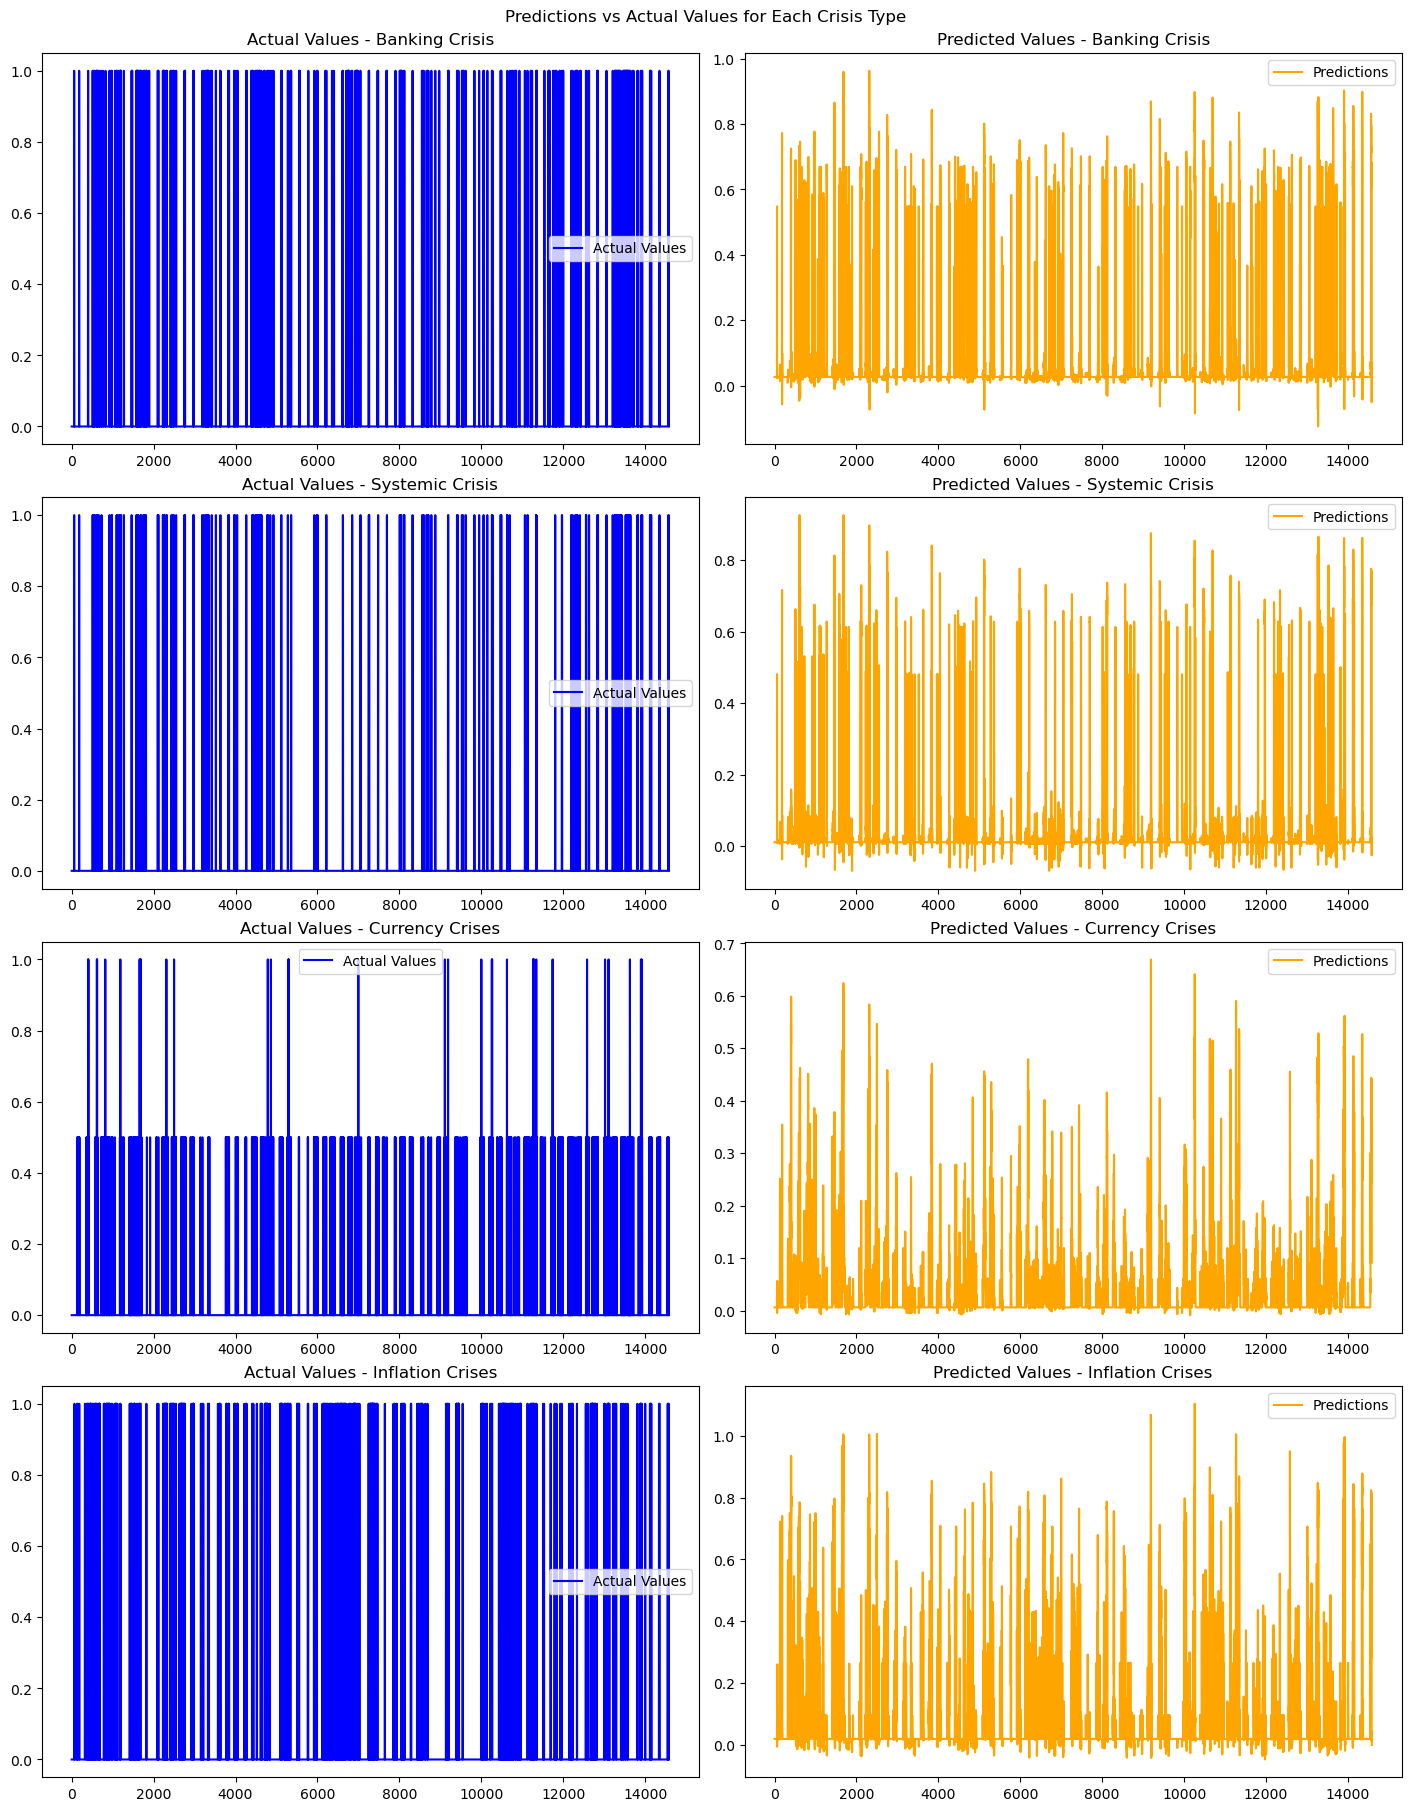

In [44]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are already defined and preprocessed
# X should be a 3D array for LSTM (samples, time steps, features)
# y should be a 2D array (samples, crisis types)

# Define the LSTM model architecture
look_back = X.shape[1]  # This is the number of time steps you're considering for each sample
n_features = X.shape[2]  # This is the number of features in each time step

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(4))  # Assuming you have 4 types of crises as the target variables

# Compile the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the LSTM model to the dataset
model.fit(X, y, epochs=10, batch_size=228)

# Predict on the dataset (assuming you want to predict on the entire set for visualization)
predictions = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions, multioutput='raw_values')
rmse = np.sqrt(mse)
print("RMSE for each crisis type:")
print(rmse)

# Create 8 subplots for the actual and predicted values of each crisis type
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18), constrained_layout=True)
fig.suptitle('Predictions vs Actual Values for Each Crisis Type')

# Names of the crisis types for titles
crisis_types = ['Banking Crisis', 'Systemic Crisis', 'Currency Crises', 'Inflation Crises']

for i in range(4):
    # Actual values plot
    axes[i, 0].plot(y[:, i], label='Actual Values', color='blue')
    axes[i, 0].set_title(f'Actual Values - {crisis_types[i]}')
    axes[i, 0].legend()

    # Predicted values plot
    axes[i, 1].plot(predictions[:, i], label='Predictions', color='orange')
    axes[i, 1].set_title(f'Predicted Values - {crisis_types[i]}')
    axes[i, 1].legend()

plt.show()


Epoch 1/10
64/64 [==============================] - 4s 17ms/step - loss: 0.0379
Epoch 2/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0333
Epoch 3/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0309
Epoch 4/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0296
Epoch 5/10
64/64 [==============================] - 1s 19ms/step - loss: 0.0292
Epoch 6/10
64/64 [==============================] - 1s 19ms/step - loss: 0.0289
Epoch 7/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0288
Epoch 8/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0287
Epoch 9/10
64/64 [==============================] - 1s 17ms/step - loss: 0.0286
Epoch 10/10
456/456 [==============================] - 2s 3ms/step
RMSE for each crisis type:
[0.17795376 0.14445705 0.12324627 0.2145985 ]


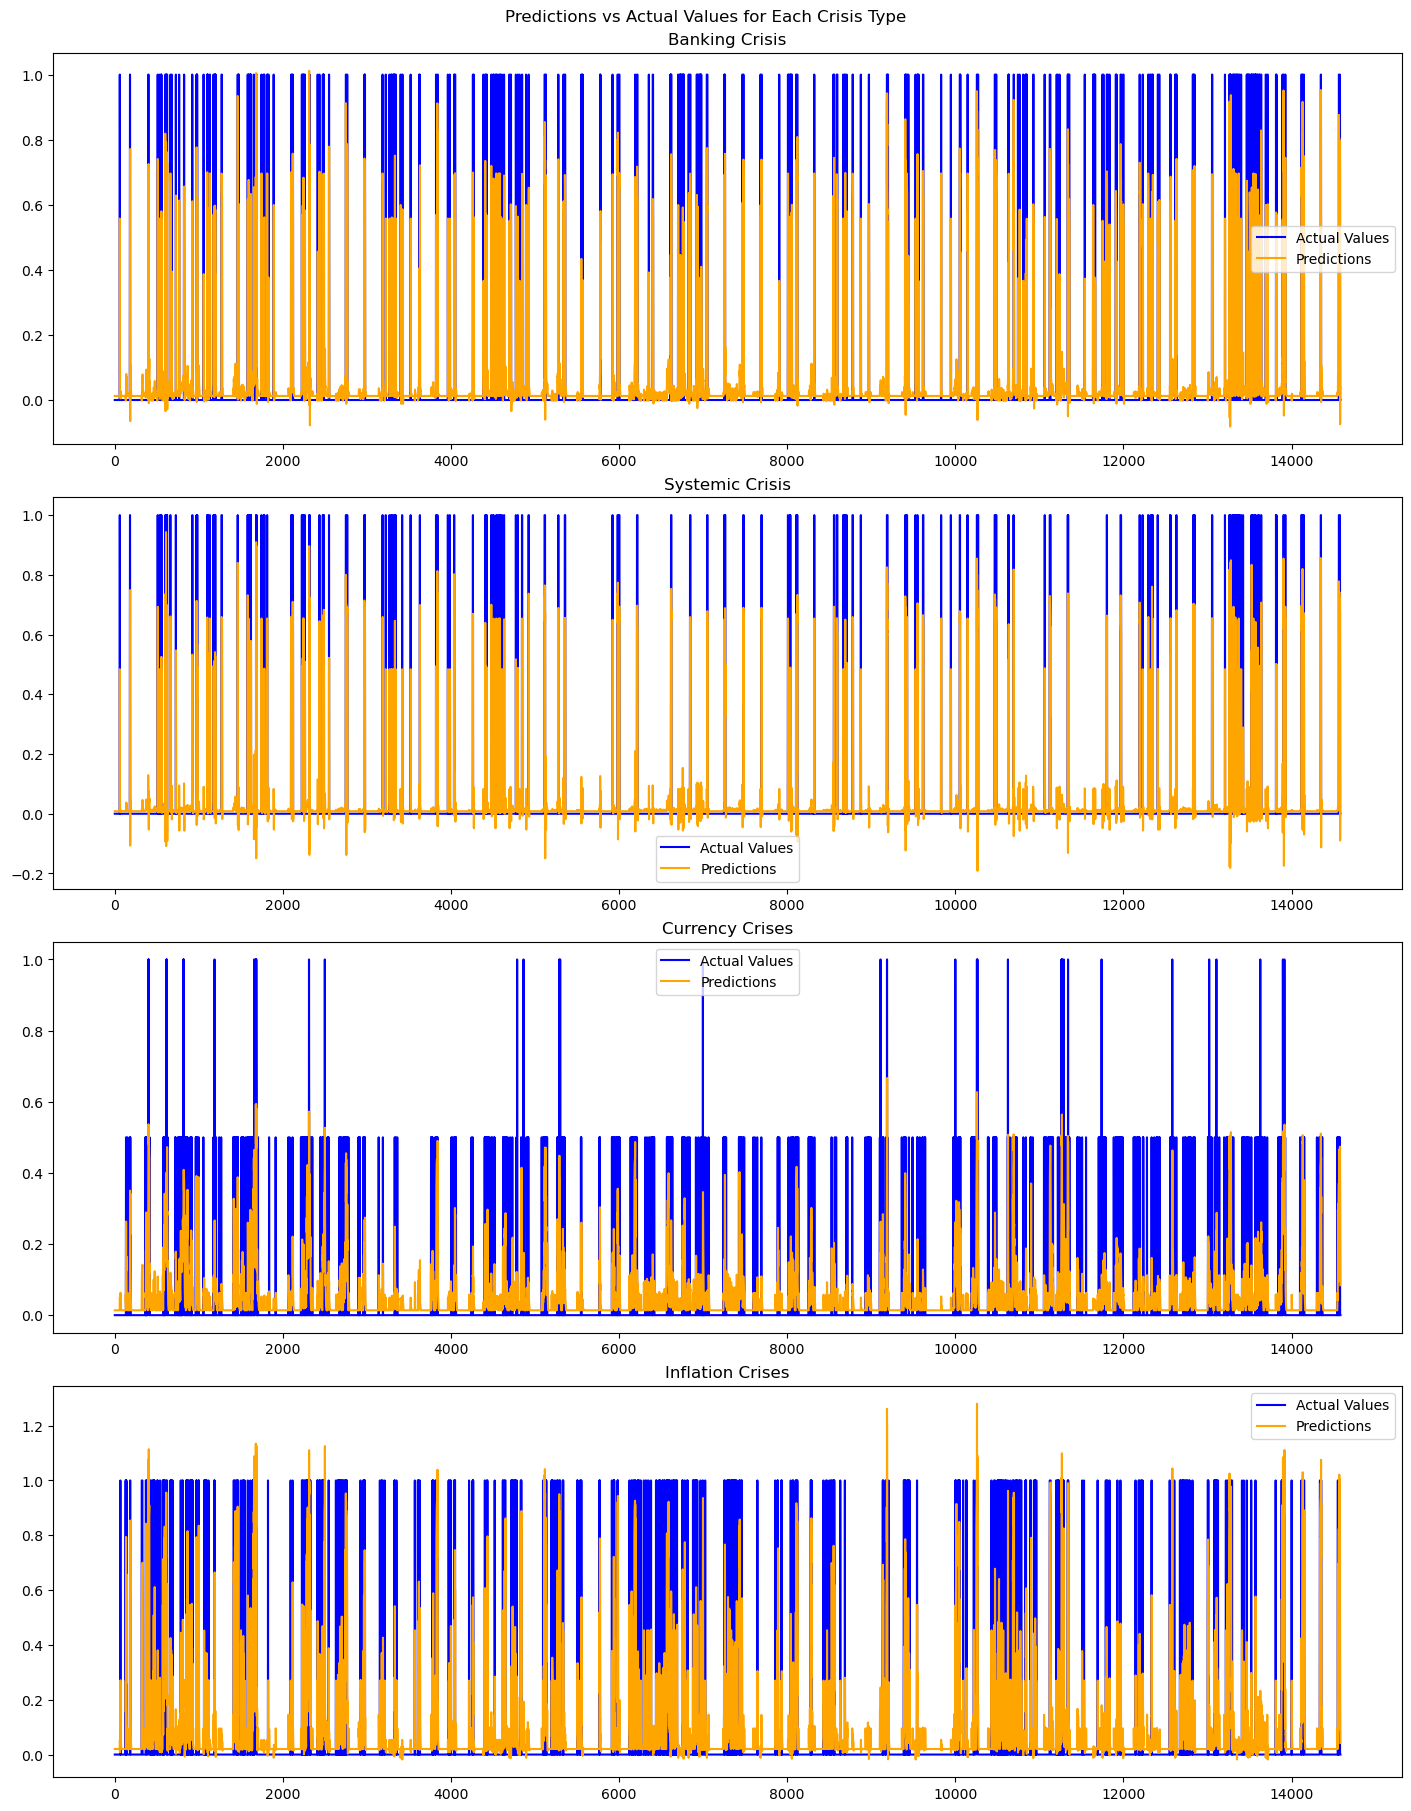

In [45]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are already defined and preprocessed
# X should be a 3D array for LSTM (samples, time steps, features)
# y should be a 2D array (samples, crisis types)

# Define the LSTM model architecture
look_back = X.shape[1]  # This is the number of time steps you're considering for each sample
n_features = X.shape[2]  # This is the number of features in each time step

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(4))  # Assuming you have 4 types of crises as the target variables

# Compile the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the LSTM model to the dataset
model.fit(X, y, epochs=10, batch_size=228)

# Predict on the dataset (assuming you want to predict on the entire set for visualization)
predictions = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions, multioutput='raw_values')
rmse = np.sqrt(mse)
print("RMSE for each crisis type:")
print(rmse)

# Create 4 subplots for the actual and predicted values of each crisis type
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 18), constrained_layout=True)
fig.suptitle('Predictions vs Actual Values for Each Crisis Type')

# Names of the crisis types for titles
crisis_types = ['Banking Crisis', 'Systemic Crisis', 'Currency Crises', 'Inflation Crises']

for i in range(4):
    # Actual values plot
    axes[i].plot(y[:, i], label='Actual Values', color='blue')
    # Predicted values plot
    axes[i].plot(predictions[:, i], label='Predictions', color='orange')
    axes[i].set_title(f'{crisis_types[i]}')
    axes[i].legend()

plt.show()


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv(r"C:\Users\dhars\Desktop\TRIMESTER 1\Z-Major Project T1\Dataset\20160923_global_crisis_data.csv")

# Filter the data for the years 2010 to 2016
data_filtered = data[(data['Year'] >= 2010) & (data['Year'] <= 2016)]

# Replace NaN values with forward fill and then backward fill
data_filtered.fillna(method='ffill', inplace=True)
data_filtered.fillna(method='bfill', inplace=True)

# Randomly select a subset of this data for training
random_sample = data_filtered.sample(n=200, random_state=42)

# Selecting relevant columns for prediction
predictors = ['exch_usd', 'Inflation, Annual percentages of average consumer prices']
targets = ['Banking Crisis ', 'Systemic Crisis', 'Currency Crises', 'Inflation Crises']

# Check if all predictor columns are present in the data
for col in predictors:
    if col not in random_sample.columns:
        raise ValueError(f"Column {col} not found in the data.")

# Normalize the input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_predictors = scaler.fit_transform(random_sample[predictors])

# Reshape input for LSTM model
X = np.array(scaled_predictors).reshape((random_sample.shape[0], 1, len(predictors)))
y = random_sample[targets]

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(y_train.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# Prepare future data for prediction (years 2017 to 2036)
future_years = np.arange(2017, 2037)
scaled_future_years = scaler.transform(np.column_stack((np.zeros(len(future_years)), future_years)))
X_future = np.array(scaled_future_years).reshape((len(future_years), 1, len(predictors)))

# Predict future crises
future_predictions = model.predict(X_future)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(future_predictions, columns=targets)
predictions_df['Year'] = future_years

print(predictions_df)



Epoch 1/100
3/3 [==============================] - 3s 310ms/step - loss: 0.0916 - val_loss: 0.1454
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0889 - val_loss: 0.1411
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0867 - val_loss: 0.1370
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0845 - val_loss: 0.1334
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0833 - val_loss: 0.1300
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0821 - val_loss: 0.1273
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0814 - val_loss: 0.1252
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0812 - val_loss: 0.1236
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0812 - val_loss: 0.1227
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0812 - val_loss: 0.1225
Epoch 11/100
3/3 [